# Predicting the Price of Pre-Owned Cars

### Importing necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os

### Changing the directory to access the dataset

In [2]:
os.chdir('C:\\Users\\Sudarsanam S\\Python for DS\\Datasets\\Classification')

### Changing the figure size for better visibility of charts

In [3]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

### Importing Data from CSV

In [4]:
cars=pd.read_csv('cars_sampled.csv')

## Data Understanding

### To Print required columns in the dataframe instead of ellipsis

In [5]:
pd.set_option('display.max_columns',500)

### Checking out the imported data

In [6]:
cars.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,30/03/2016 13:51,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,30/03/2016 0:00,20257,7/4/2016 4:44
1,7/3/2016 9:54,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,7/3/2016 0:00,88045,26/03/2016 13:17
2,1/4/2016 0:57,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,31/03/2016 0:00,27449,1/4/2016 8:40
3,19/03/2016 17:50,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,19/03/2016 0:00,34537,7/4/2016 4:44
4,16/03/2016 14:51,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,16/03/2016 0:00,55270,1/4/2016 23:18


### Checking the dimensions of data(Rows and Columns)

In [7]:
cars.shape

(50001, 19)

### Deep Copying the original dataset not to disturb the one

In [8]:
df=cars.copy() #deepcopy

### Checking the information to get the number of non-null values and datatypes

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50001 non-null  object
 1   name                 50001 non-null  object
 2   seller               50001 non-null  object
 3   offerType            50001 non-null  object
 4   price                50001 non-null  int64 
 5   abtest               50001 non-null  object
 6   vehicleType          44813 non-null  object
 7   yearOfRegistration   50001 non-null  int64 
 8   gearbox              47177 non-null  object
 9   powerPS              50001 non-null  int64 
 10  model                47243 non-null  object
 11  kilometer            50001 non-null  int64 
 12  monthOfRegistration  50001 non-null  int64 
 13  fuelType             45498 non-null  object
 14  brand                50001 non-null  object
 15  notRepairedDamage    40285 non-null  object
 16  date

### Understanding the Descriptive statistics of numerical columns in a DataFrame

In [10]:
df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,5.000100e+04,50001.000000,50001.000000,50001.000000,50001.000000,50001.000000
mean,6.559865e+03,2005.544229,116.496130,125613.687726,5.743725,50775.216696
std,8.581847e+04,122.991832,230.567709,40205.234483,3.711345,25743.701933
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,1067.000000
25%,1.150000e+03,1999.000000,69.000000,125000.000000,3.000000,30559.000000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,49504.000000
75%,7.190000e+03,2008.000000,150.000000,150000.000000,9.000000,71404.000000
max,1.234568e+07,9999.000000,19312.000000,150000.000000,12.000000,99998.000000


### Changing the decimal format to 3 places to avoid exponential values for better understanding

In [11]:
pd.set_option('display.float_format',lambda x: '%.3f' %x)

### Checking descriptive statistics, gives clear view

In [12]:
df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


***Observations : In Price column,***
   1. The standard deviation is very huge(85818)
   2. The mean and median(50% Quartile) shows that the data is very skewed
   3. The max price is 12345678, looks like a outlier.
   4. The min and max of yearofRegistration is from 1000 and 9999, which seem not correct.
   5. The min and max value of powerPS is 0 and 19312, which seem not right.
   6. The monthOfRegistration shows month in numbers, where 0 seem not represents anything.

### Checking for number of missing or null values

In [13]:
df.isnull().sum()

dateCrawled               0
name                      0
seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5188
yearOfRegistration        0
gearbox                2824
powerPS                   0
model                  2758
kilometer                 0
monthOfRegistration       0
fuelType               4503
brand                     0
notRepairedDamage      9716
dateCreated               0
postalCode                0
lastSeen                  0
dtype: int64

## Data Wrangling

### Checking the column names

In [14]:
df.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'postalCode', 'lastSeen'],
      dtype='object')

### Creating a list of columns, which seem irrelevent for EDA and Prediction

In [15]:
col=['name','dateCrawled','dateCreated','postalCode','lastSeen']
col

['name', 'dateCrawled', 'dateCreated', 'postalCode', 'lastSeen']

### Dropping columns

In [16]:
df=df.drop(columns=col,axis=1)

### Checking the dimensions of dataset after dropping columns

In [17]:
df.shape

(50001, 14)

### Dropping duplicate values in same dataset and checking the dimensions

In [18]:
df.drop_duplicates(keep='first',inplace=True)

In [19]:
df.shape

(49531, 14)

### Checking the number of null values

In [20]:
df.isnull().sum()

seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5152
yearOfRegistration        0
gearbox                2765
powerPS                   0
model                  2730
kilometer                 0
monthOfRegistration       0
fuelType               4467
brand                     0
notRepairedDamage      9640
dtype: int64

### Setting the option to display max number of 1000 rows

In [21]:
pd.set_option('display.max_rows',1000)

### Checking the count respective to yearOfRegistration sorted by years

In [22]:
yearwise_count = df['yearOfRegistration'].value_counts().sort_index()
yearwise_count

1000       6
1255       1
1500       2
1910      14
1928       1
1929       1
1933       1
1934       1
1936       2
1938       1
1940       1
1941       1
1943       2
1945       2
1947       2
1950       4
1951       4
1952       3
1953       2
1954       1
1955       6
1956       7
1957       5
1958       4
1959       5
1960      32
1961       7
1962       6
1963      11
1964      16
1965      11
1966      13
1967      18
1968       7
1969      25
1970      55
1971      27
1972      39
1973      17
1974      24
1975      21
1976      31
1977      28
1978      49
1979      49
1980      77
1981      32
1982      39
1983      57
1984      49
1985     110
1986      53
1987      80
1988     132
1989     197
1990     395
1991     408
1992     391
1993     455
1994     622
1995    1267
1996    1403
1997    1956
1998    2428
1999    3026
2000    3275
2001    2782
2002    2554
2003    2731
2004    2597
2005    3101
2006    2660
2007    2347
2008    2186
2009    2010
2010    1643
2011    1544

#### Setting the Working Range - 1950 to 2018

In [23]:
sum(df['yearOfRegistration']>2018)

26

In [24]:
sum(df['yearOfRegistration']<1950)

38

### Checking the impact of yearOfRegistration with price

<AxesSubplot: xlabel='yearOfRegistration', ylabel='price'>

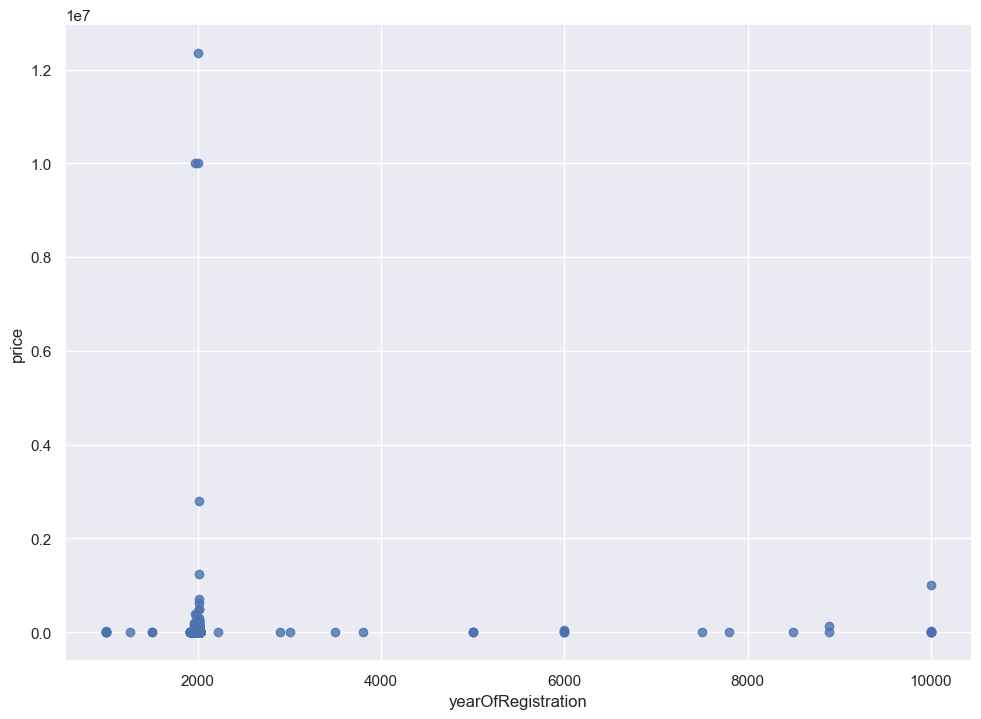

In [25]:
sns.regplot(data=df,x='yearOfRegistration',y='price',scatter=True,fit_reg=False)

In [26]:
df['price'].value_counts().sort_index()

0           1415
1            172
2              1
3              1
5              4
            ... 
1250000        1
2795000        1
9999999        1
10010011       1
12345678       1
Name: price, Length: 2393, dtype: int64

***Observations: The Price of 0, 9999999, 10010011, 12345678 doesn't seem correct. It is to be removed from dataset for better model.***

### Checking the same on plot on price

<AxesSubplot: xlabel='price', ylabel='Count'>

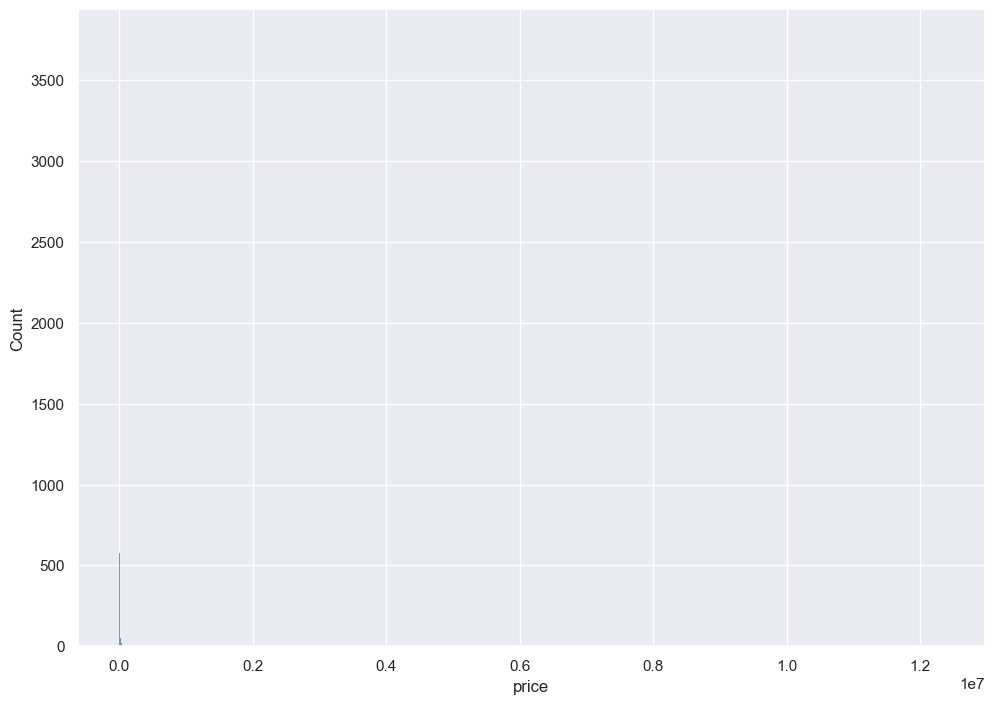

In [27]:
sns.histplot(cars['price'],kde=False)

### Plotting boxplot to understand outliers better

<AxesSubplot: >

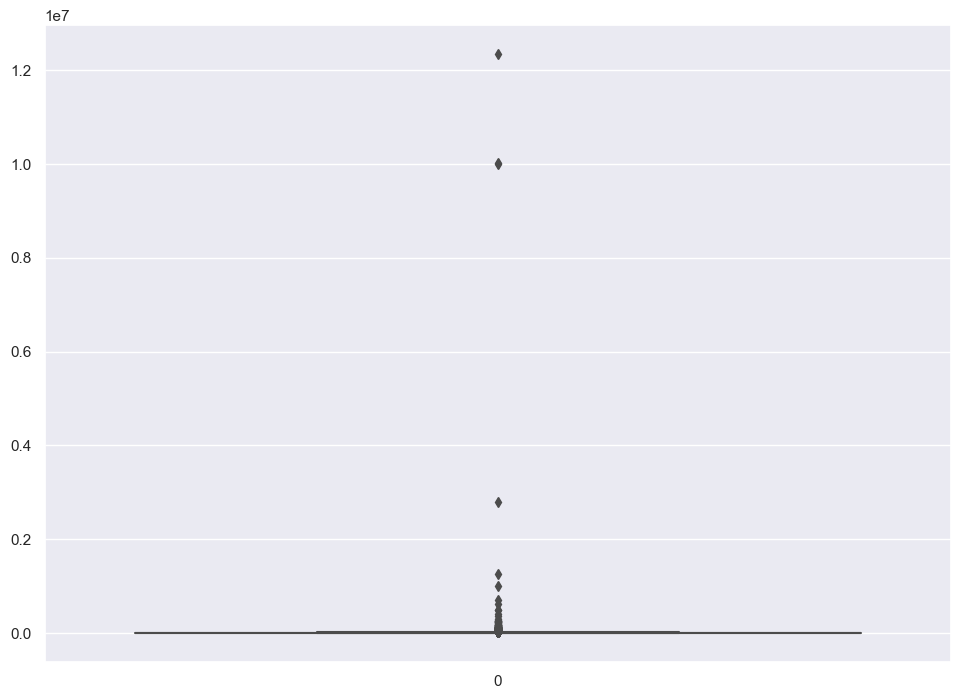

In [28]:
sns.boxplot(df['price'])

***Observations : The invisibility of box says that there are considerable number of outliers, which needs to be taken care.***

#### Setting the Working Range - 100 to 150000

In [29]:
sum(df['price']>150000)

34

In [30]:
sum(df['price']<100)

1748

In [31]:
df['powerPS'].value_counts().sort_index()

0        5533
1           3
2           2
3           2
4           4
5          17
6           2
7           1
9           1
10          2
11          4
12          6
13          1
14          6
15          3
16          1
18          9
19          2
20          1
22          1
23          3
24          5
26         46
27          5
29          2
30          7
31          1
32          2
33          5
34         29
35          3
36          1
37         11
38          4
39         18
40         39
41         51
42          1
43         24
44         65
45        388
46          5
47          4
48         12
49          2
50        580
51          8
52         41
53         27
54        755
55        285
56         34
57         19
58        488
59         41
60       2149
61        151
62         15
63         53
64        212
65        300
66         22
67         55
68        345
69        482
70        137
71        185
72         73
73         90
74         46
75       3229
76    

C:\Users\Sudarsanam S\AppData\Local\Temp\ipykernel_21464\1651665209.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['powerPS'])


<AxesSubplot: xlabel='powerPS', ylabel='Density'>

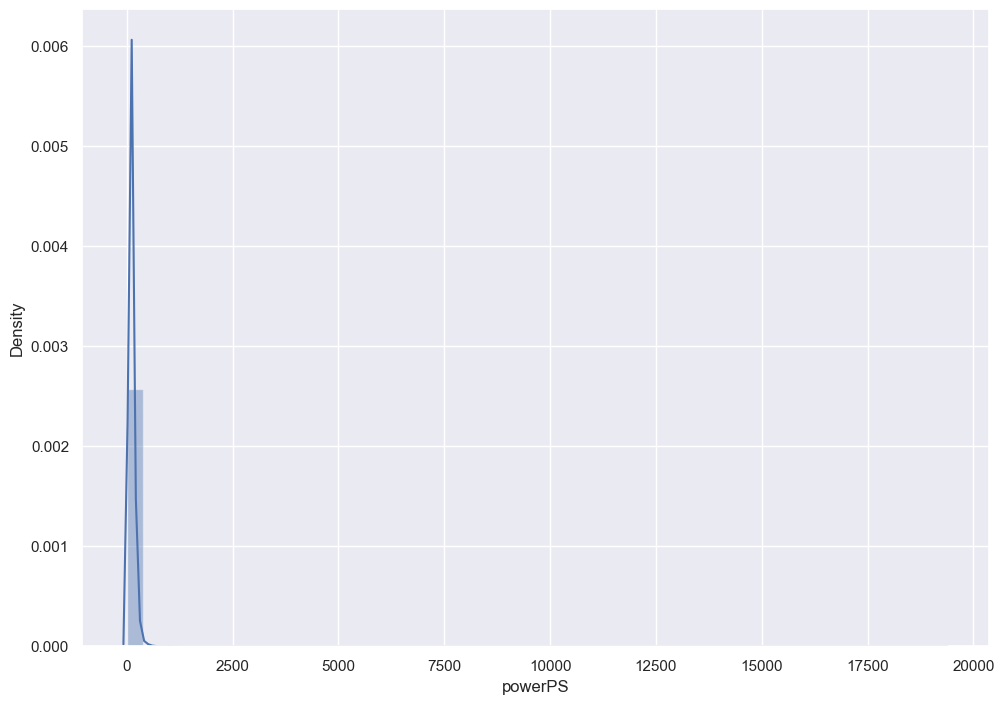

In [32]:
sns.distplot(df['powerPS'])

### Checking the descriptive statistics of powerPS

In [33]:
df['powerPS'].describe()

count   49531.000
mean      116.501
std       231.536
min         0.000
25%        69.000
50%       105.000
75%       150.000
max     19312.000
Name: powerPS, dtype: float64

***Observations : Eventhough the mean and median is near, the STD is more, which needs to be considered.***

### Checking the boxplot of powerPS

<AxesSubplot: >

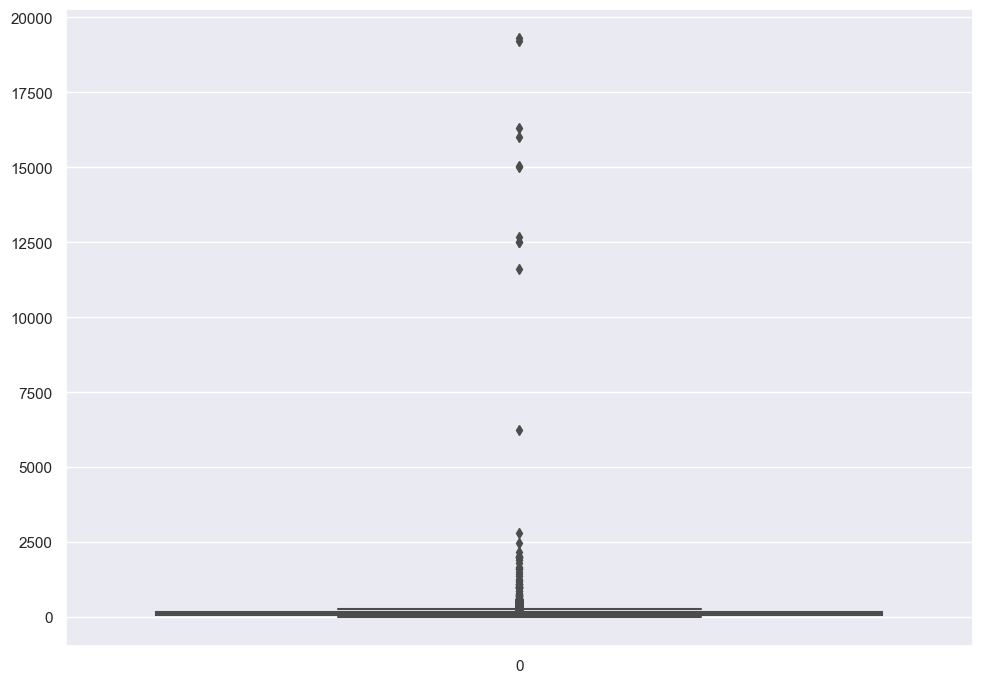

In [34]:
sns.boxplot(df['powerPS'])

***Observations : Need to remove outliers to get the proper distribution.***

### Checking the impact of powerPS on price

<AxesSubplot: xlabel='powerPS', ylabel='price'>

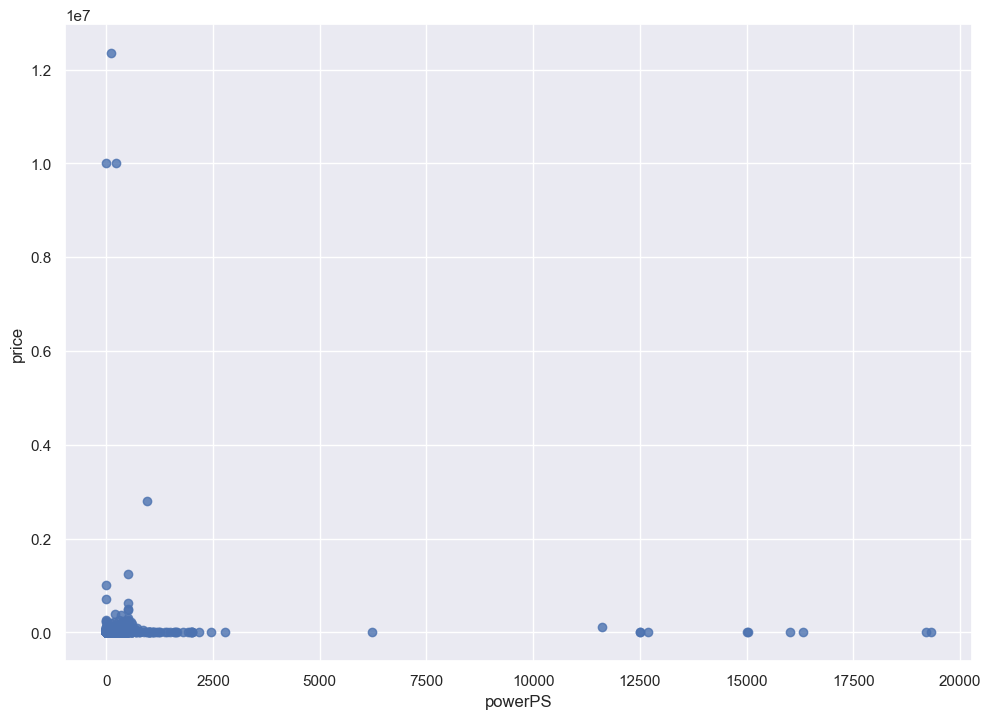

In [35]:
sns.regplot(data=df,x='powerPS',y='price',scatter=True,fit_reg=False)

***Observations : As the number of data with 0 powerPS is more, the plot doesn't seem to provide much information.***

#### Setting the Working Range - 10 to 500

In [36]:
sum(df['powerPS']>500)

115

In [37]:
sum(df['powerPS']<10)

5565

### Changing the data by removing the outliers and irrelevent data

In [38]:
df = df[
        (df.yearOfRegistration>=1950 )
        &(df.yearOfRegistration<=2018)
        &(df.price>=100)
        &(df.price<=150000)
        &(df.powerPS>=10)
        &(df.powerPS<=500)   
        ]

In [39]:
df

,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN
1,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no
2,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN
3,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no
4,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49991,private,offer,10900,test,limousine,2004,manual,231,x_reihe,150000,8,petrol,bmw,no
49992,private,offer,790,test,limousine,1998,manual,82,astra,150000,9,diesel,opel,no
49993,private,offer,830,test,small car,1999,manual,60,clio,125000,8,petrol,renault,no
49995,private,offer,2290,test,station wagon,2001,manual,101,astra,150000,3,petrol,opel,no


### Checking the max of Yearof Registration to find the age of car

In [40]:
df['yearOfRegistration'].max()

2018

In [41]:
2018-df['yearOfRegistration']

0        15
1        13
2        15
3        12
4        10
         ..
49991    14
49992    20
49993    19
49995    17
50000    12
Name: yearOfRegistration, Length: 42772, dtype: int64

In [42]:
df['monthOfRegistration']/12

0       0.250
1       0.500
2       0.917
3       1.000
4       0.917
         ... 
49991   0.667
49992   0.750
49993   0.667
49995   0.250
50000   0.833
Name: monthOfRegistration, Length: 42772, dtype: float64

In [43]:
2018-df['yearOfRegistration'] + df['monthOfRegistration']/12

0       15.250
1       13.500
2       15.917
3       13.000
4       10.917
         ...  
49991   14.667
49992   20.750
49993   19.667
49995   17.250
50000   12.833
Length: 42772, dtype: float64

### Creating new column 'age' by using Year and Month of Registration

In [44]:
df['age']=(2018-df['yearOfRegistration'] + df['monthOfRegistration']/12)

### Rounding off the age to two decimal places

In [45]:
df['age']=round(df['age'],2)

### Checking the inferential statistics for newly created age column

In [46]:
df['age'].describe()

count   42772.000
mean       14.873
std         7.093
min         0.000
25%        10.330
50%        14.830
75%        19.170
max        67.750
Name: age, dtype: float64

### Dropping unwanted columns from the dataframe

In [47]:
df.drop(columns=['yearOfRegistration','monthOfRegistration'],axis=1,inplace=True)

## Data Visualization

<AxesSubplot: xlabel='age', ylabel='Count'>

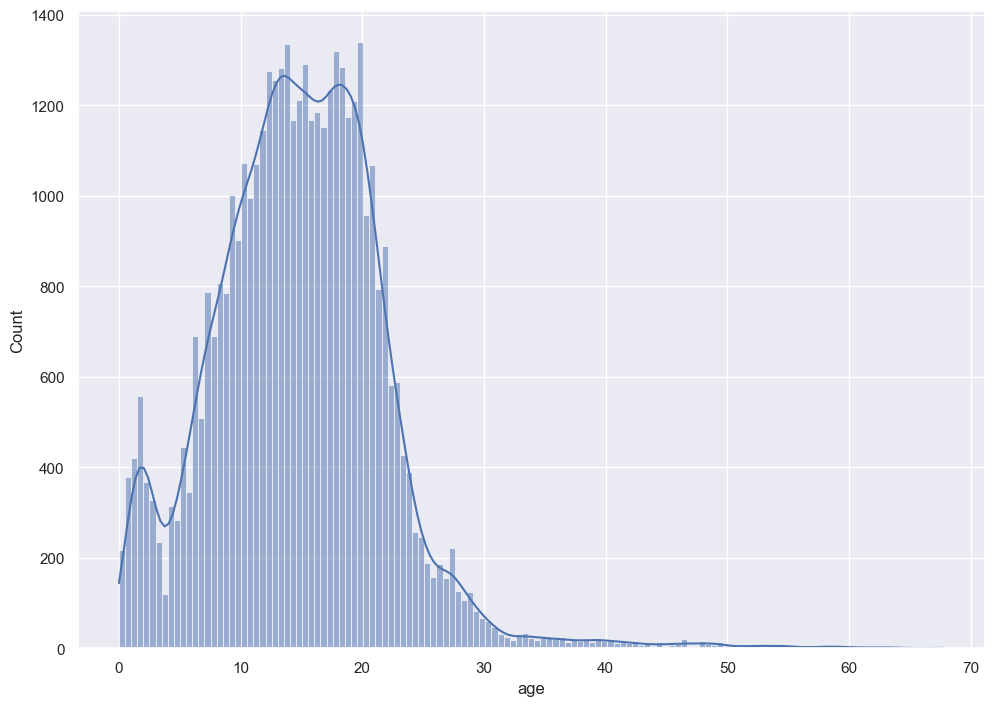

In [48]:
sns.histplot(df['age'],kde=True)

<AxesSubplot: >

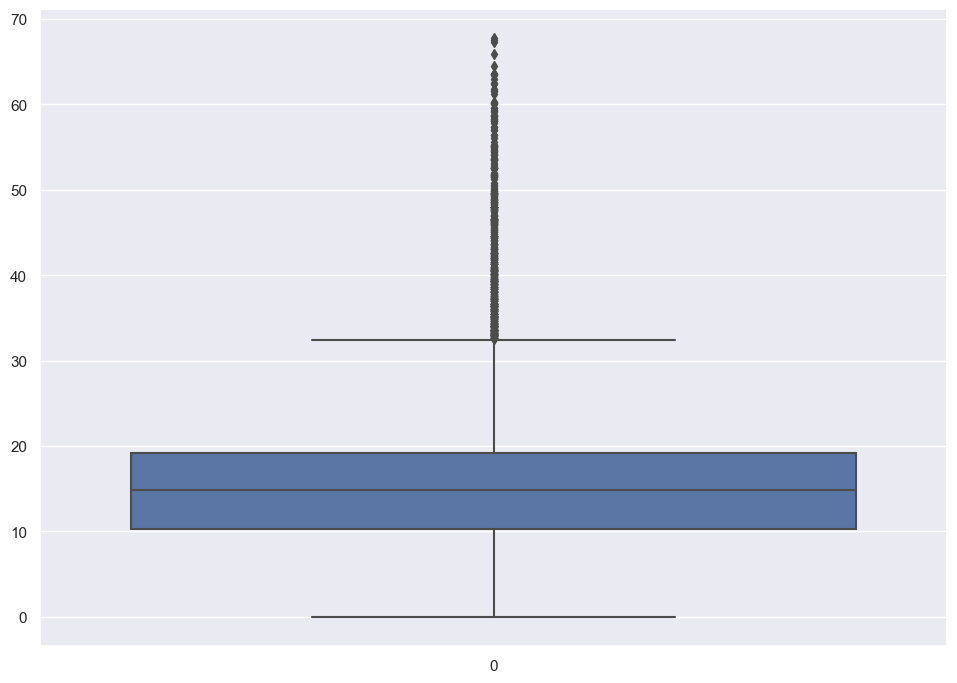

In [49]:
sns.boxplot(df['age'])

C:\Users\Sudarsanam S\AppData\Local\Temp\ipykernel_21464\2239777731.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.price)


<AxesSubplot: xlabel='price', ylabel='Density'>

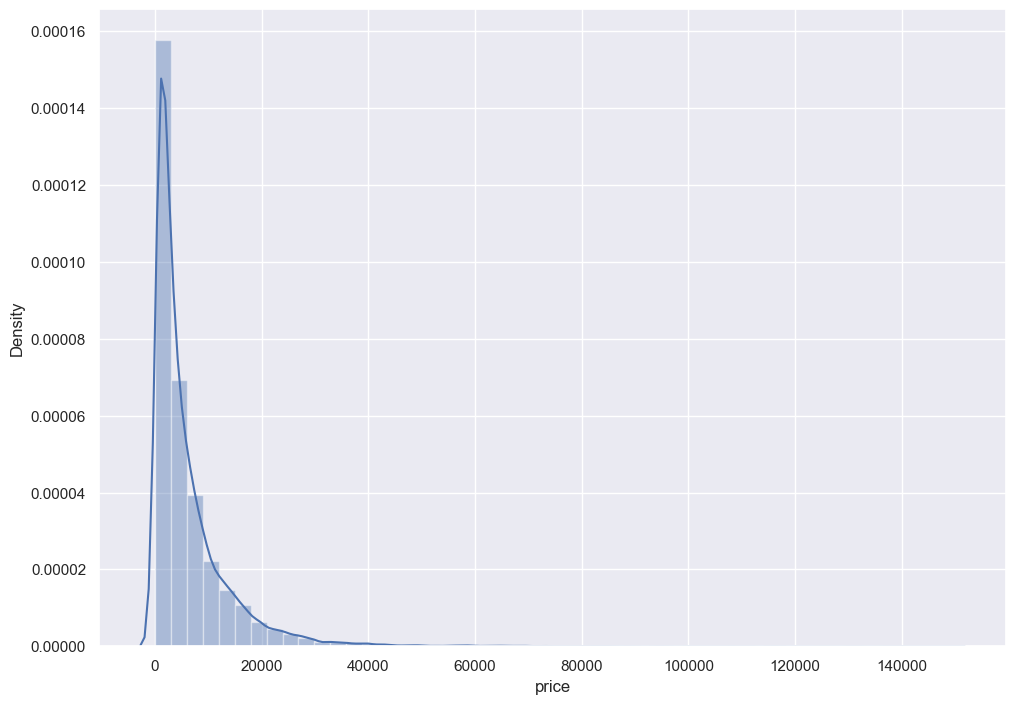

In [50]:
sns.distplot(df.price)

<AxesSubplot: >

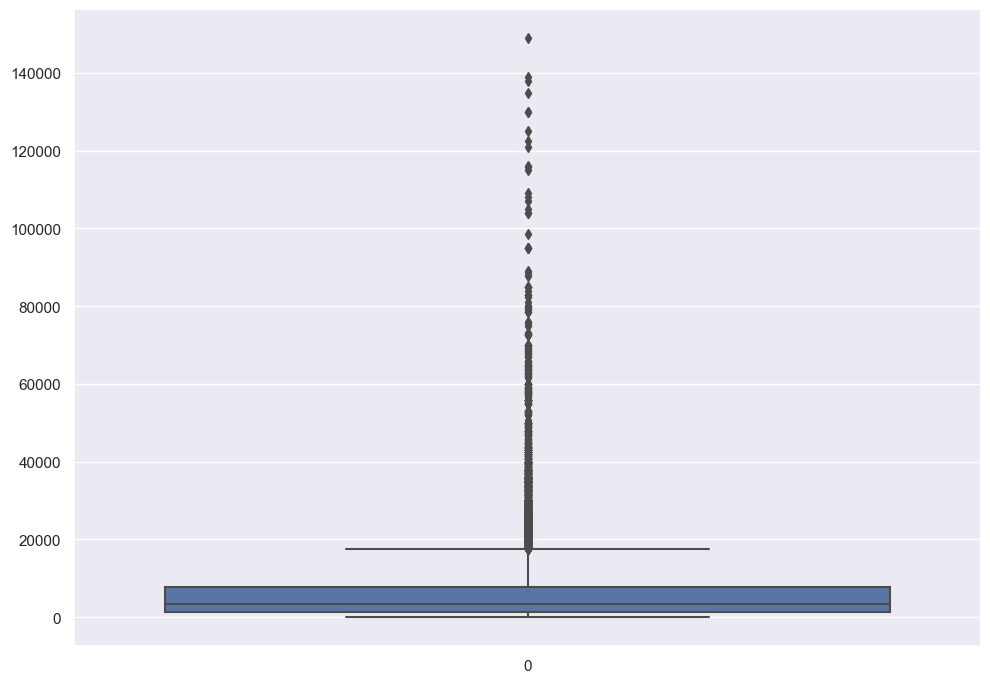

In [51]:
sns.boxplot(df.price)

C:\Users\Sudarsanam S\AppData\Local\Temp\ipykernel_21464\4072932369.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.powerPS)


<AxesSubplot: xlabel='powerPS', ylabel='Density'>

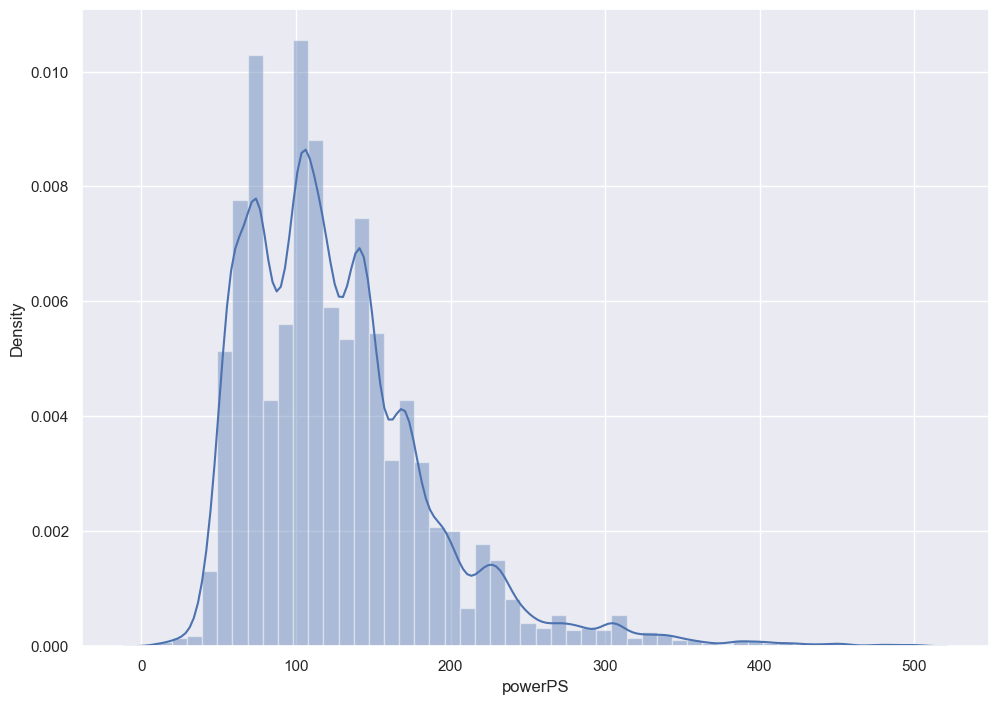

In [52]:
sns.distplot(df.powerPS)

<AxesSubplot: >

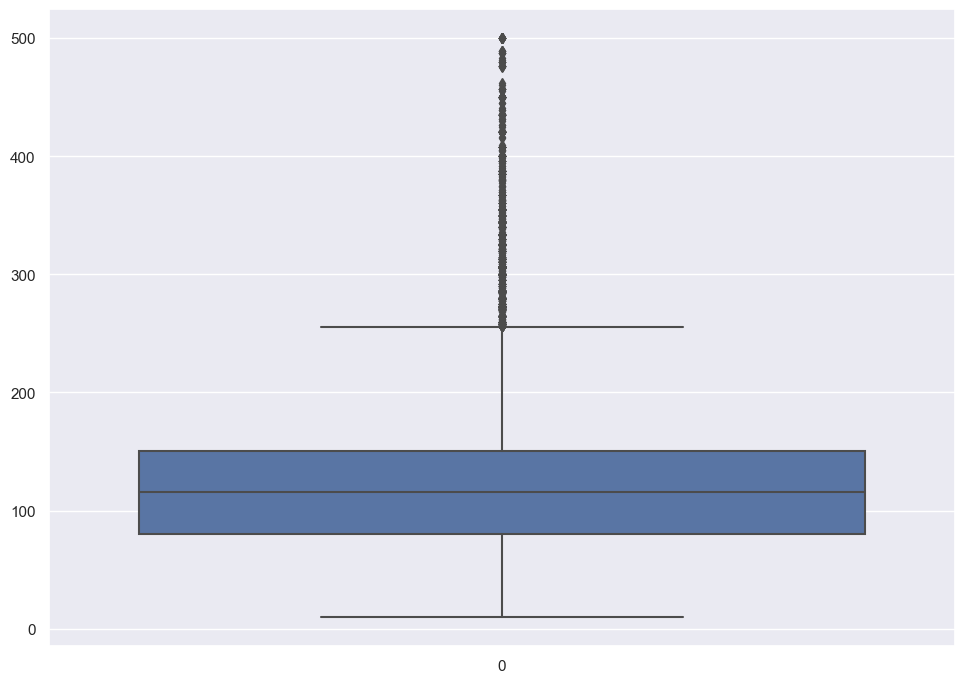

In [53]:
sns.boxplot(df.powerPS)

<AxesSubplot: xlabel='age', ylabel='price'>

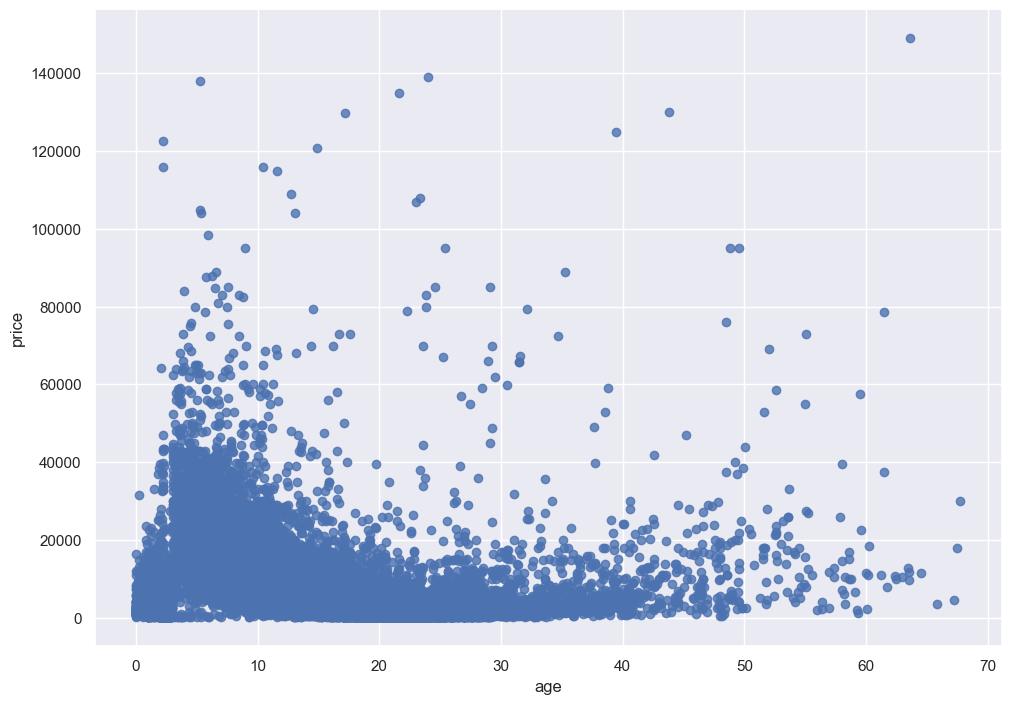

In [54]:
sns.regplot(data=df,x='age',y='price',scatter=True,fit_reg=False)

<AxesSubplot: xlabel='powerPS', ylabel='price'>

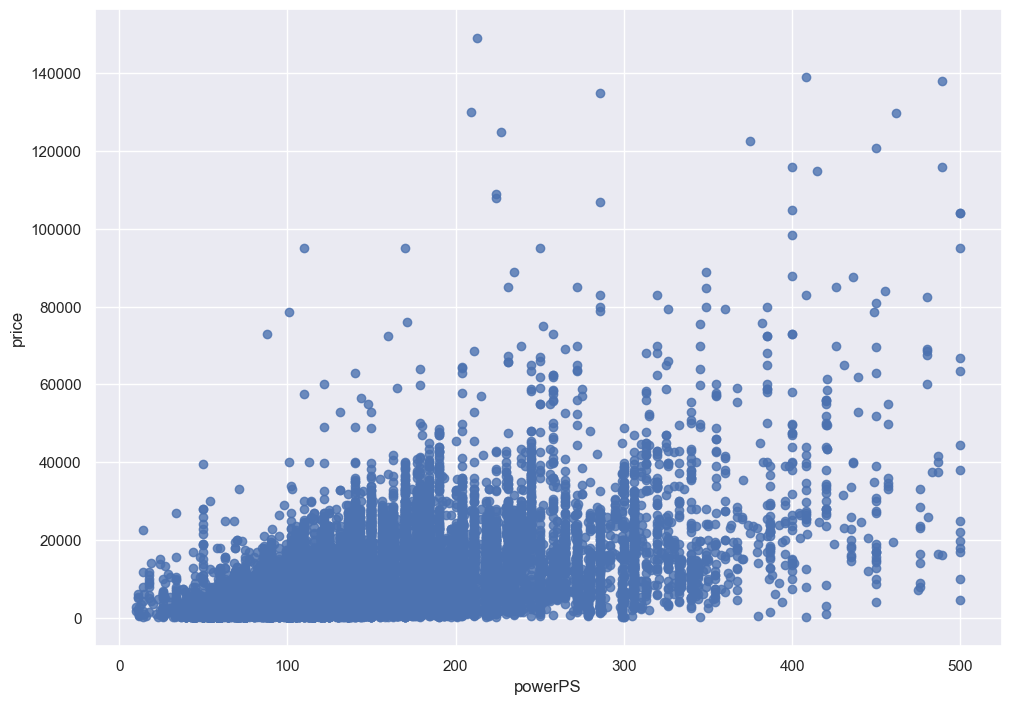

In [55]:
sns.regplot(data=df,x='powerPS',y='price',scatter=True,fit_reg=False)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42772 entries, 0 to 50000
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seller             42772 non-null  object 
 1   offerType          42772 non-null  object 
 2   price              42772 non-null  int64  
 3   abtest             42772 non-null  object 
 4   vehicleType        39896 non-null  object 
 5   gearbox            41978 non-null  object 
 6   powerPS            42772 non-null  int64  
 7   model              41089 non-null  object 
 8   kilometer          42772 non-null  int64  
 9   fuelType           40175 non-null  object 
 10  brand              42772 non-null  object 
 11  notRepairedDamage  36495 non-null  object 
 12  age                42772 non-null  float64
dtypes: float64(1), int64(3), object(9)
memory usage: 5.6+ MB


### Checking only the columns with object datatype

In [57]:
df.select_dtypes('object')

,seller,offerType,abtest,vehicleType,gearbox,model,fuelType,brand,notRepairedDamage
0,private,offer,test,limousine,manual,3er,diesel,bmw,NaN
1,private,offer,control,suv,manual,xc_reihe,diesel,volvo,no
2,private,offer,test,bus,manual,touran,diesel,volkswagen,NaN
3,private,offer,control,small car,manual,ibiza,petrol,seat,no
4,private,offer,test,suv,automatic,xc_reihe,diesel,volvo,no
...,...,...,...,...,...,...,...,...,...
49991,private,offer,test,limousine,manual,x_reihe,petrol,bmw,no
49992,private,offer,test,limousine,manual,astra,diesel,opel,no
49993,private,offer,test,small car,manual,clio,petrol,renault,no
49995,private,offer,test,station wagon,manual,astra,petrol,opel,no


### Using cross tabulation for the EDA and Visualization on Categorical variables

In [58]:
df.seller.value_counts()

private       42771
commercial        1
Name: seller, dtype: int64

In [59]:
pd.crosstab(df['seller'],columns='count',normalize=True)

col_0,count
seller,
commercial,0.000
private,1.000


In [60]:
df['offerType'].value_counts()

offer    42772
Name: offerType, dtype: int64

In [61]:
df['abtest'].value_counts()

test       22128
control    20644
Name: abtest, dtype: int64

In [62]:
pd.crosstab(df['abtest'],columns='count',normalize=True)

col_0,count
abtest,
control,0.483
test,0.517


<AxesSubplot: xlabel='abtest', ylabel='count'>

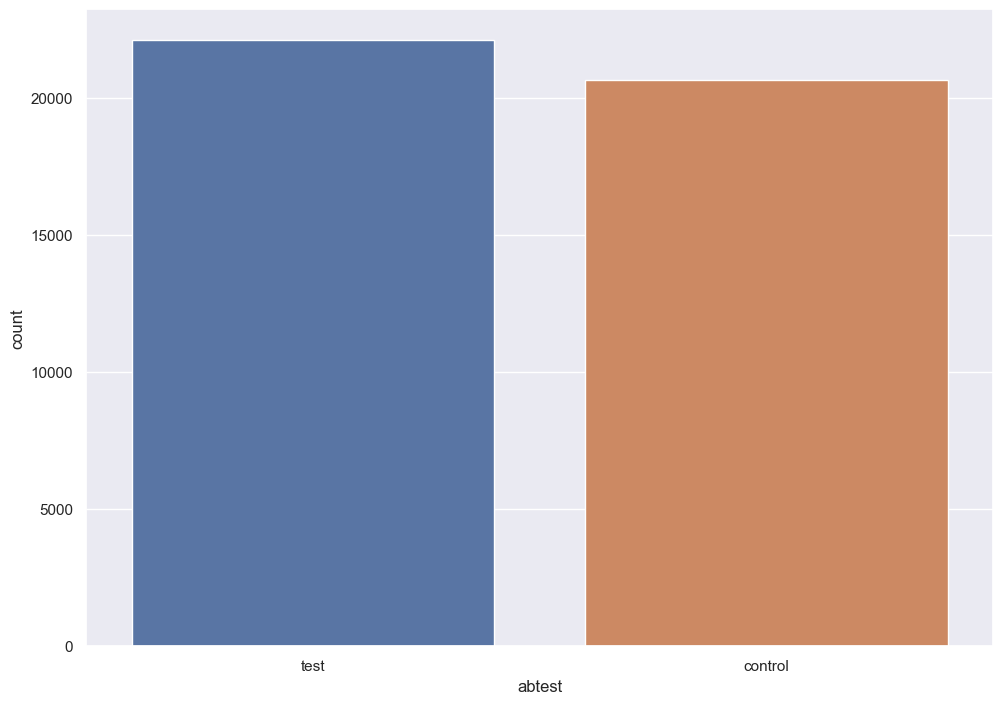

In [63]:
sns.countplot(x=df['abtest'])

<AxesSubplot: xlabel='abtest', ylabel='price'>

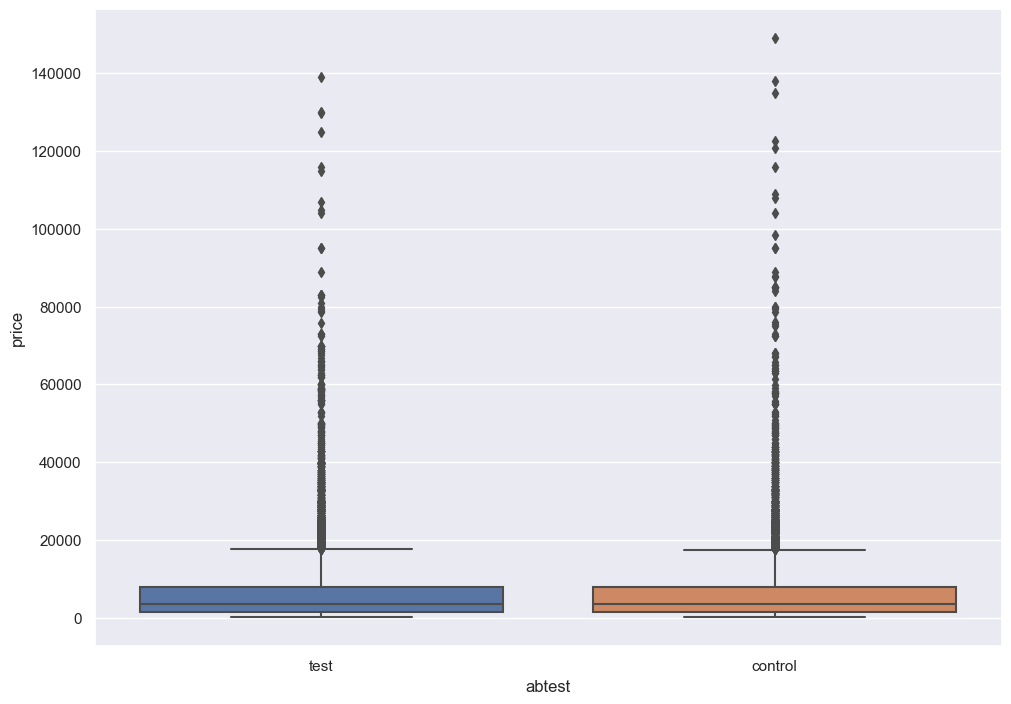

In [64]:
sns.boxplot(data=df,x=df.abtest,y=df.price)

In [65]:
df.vehicleType.value_counts()

limousine        11746
small car         9285
station wagon     8076
bus               3597
cabrio            2792
coupe             2261
suv               1813
others             326
Name: vehicleType, dtype: int64

In [66]:
pd.crosstab(df.vehicleType,columns='count',normalize=True)

col_0,count
vehicleType,
bus,0.090
cabrio,0.070
coupe,0.057
limousine,0.294
others,0.008
small car,0.233
station wagon,0.202
suv,0.045


<AxesSubplot: xlabel='vehicleType', ylabel='count'>

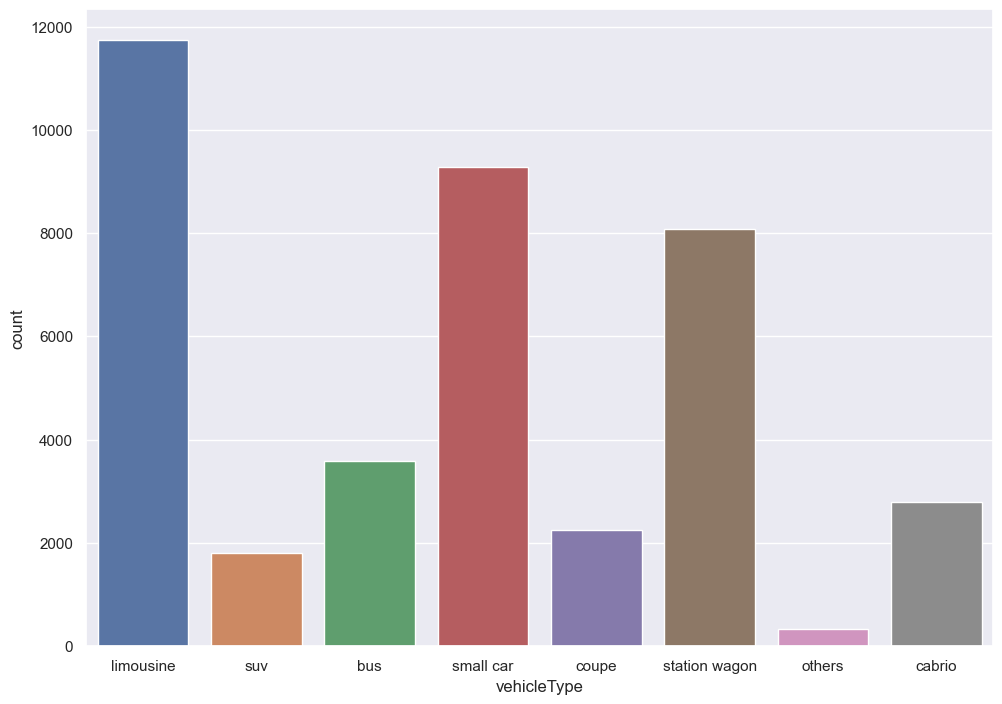

In [67]:
sns.countplot(x=df.vehicleType)

<AxesSubplot: xlabel='vehicleType', ylabel='price'>

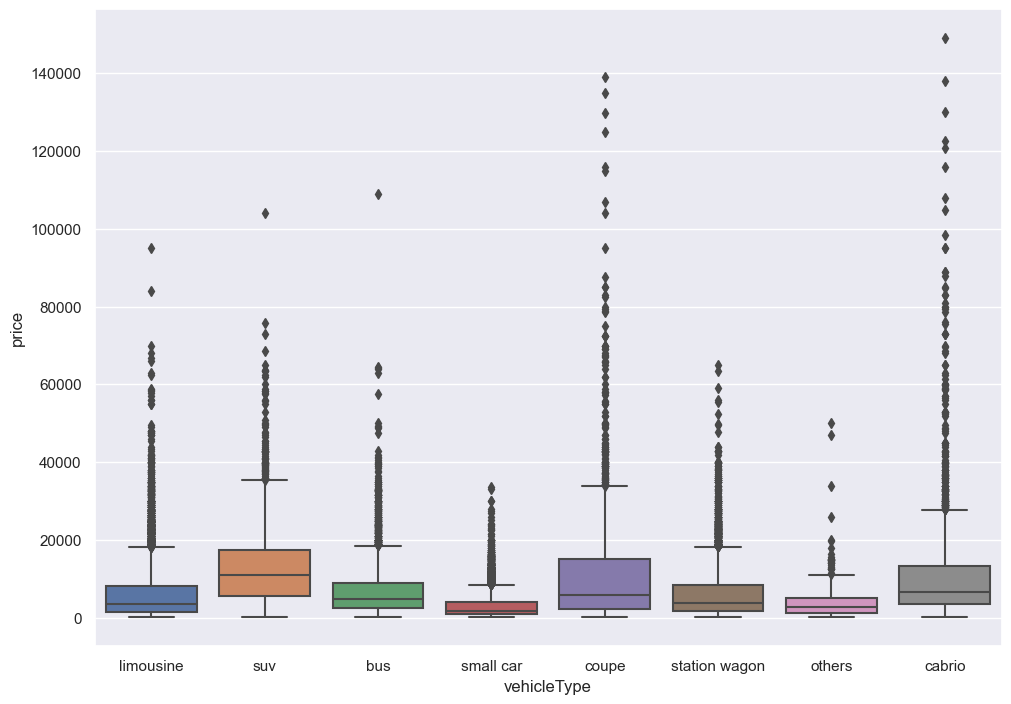

In [68]:
sns.boxplot(data=df,x='vehicleType',y='price')

In [69]:
df.gearbox.value_counts()

manual       32582
automatic     9396
Name: gearbox, dtype: int64

In [70]:
pd.crosstab(df.gearbox,columns=df.vehicleType,normalize='index')

vehicleType,bus,cabrio,coupe,limousine,others,small car,station wagon,suv
gearbox,,,,,,,,
automatic,0.069,0.082,0.079,0.349,0.003,0.081,0.240,0.098
manual,0.096,0.066,0.050,0.280,0.010,0.275,0.193,0.030


In [71]:
pd.crosstab(df.gearbox,columns=df.vehicleType,normalize=True)

vehicleType,bus,cabrio,coupe,limousine,others,small car,station wagon,suv
gearbox,,,,,,,,
automatic,0.016,0.019,0.018,0.080,0.001,0.019,0.055,0.022
manual,0.074,0.051,0.039,0.216,0.008,0.212,0.148,0.023


In [72]:
pd.crosstab(df.gearbox,columns='count',normalize=True)

col_0,count
gearbox,
automatic,0.224
manual,0.776


<AxesSubplot: xlabel='gearbox', ylabel='count'>

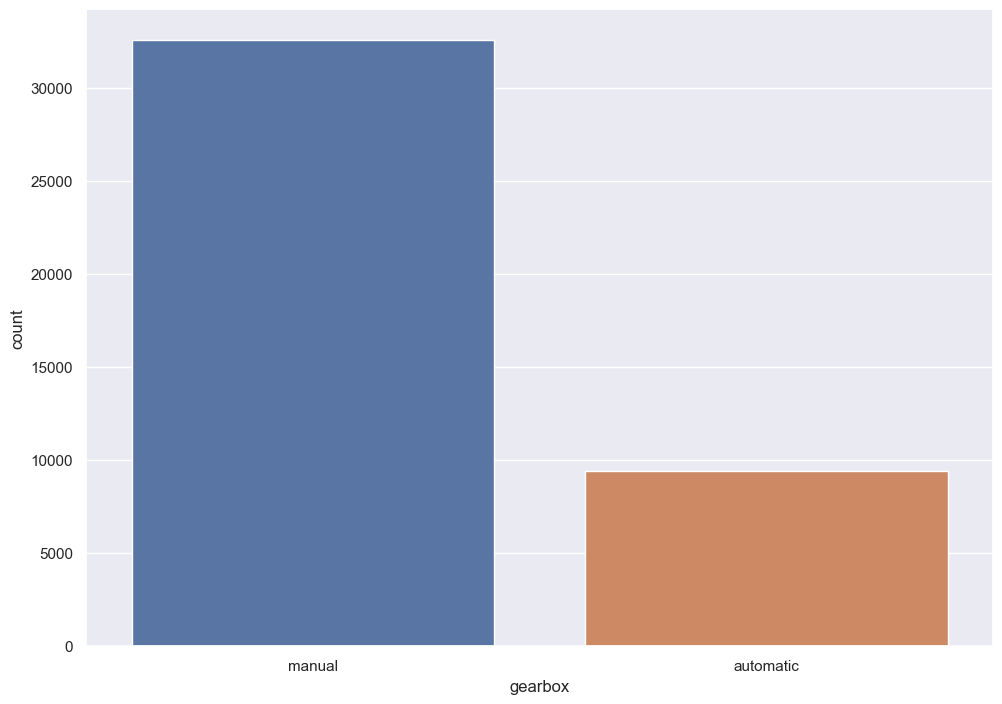

In [73]:
sns.countplot(x=df.gearbox)

<AxesSubplot: xlabel='gearbox', ylabel='price'>

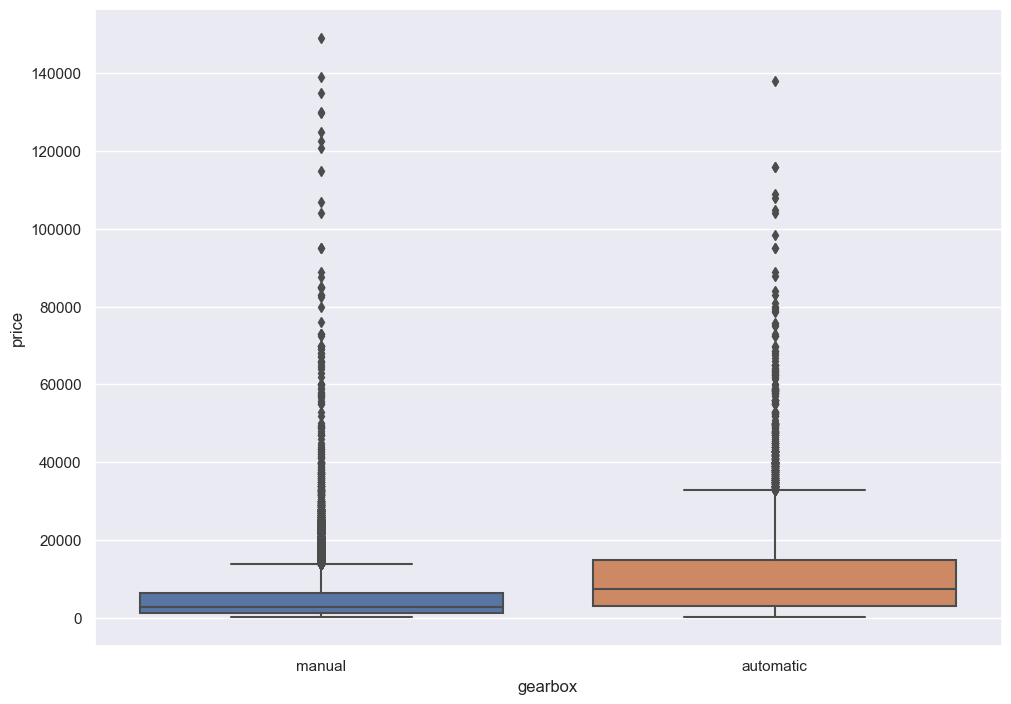

In [74]:
sns.boxplot(data=df,x='gearbox',y='price')

In [75]:
df.model.value_counts()

golf                  3478
others                2900
3er                   2482
polo                  1500
corsa                 1386
astra                 1276
a4                    1230
passat                1200
c_klasse              1042
5er                   1013
e_klasse               907
a3                     826
a6                     737
focus                  701
fiesta                 637
transporter            630
2_reihe                603
fortwo                 532
1er                    527
a_klasse               497
vectra                 491
twingo                 479
clio                   437
3_reihe                437
touran                 422
mondeo                 388
punto                  363
ibiza                  354
megane                 340
zafira                 325
x_reihe                288
octavia                283
lupo                   280
cooper                 270
ka                     269
fabia                  251
clk                    241
c

In [76]:
pd.crosstab(df.model,columns='count',normalize=True)

col_0,count
model,
100,0.001
145,0.000
147,0.001
156,0.002
159,0.000
1_reihe,0.004
1er,0.013
200,0.000
2_reihe,0.015


<AxesSubplot: xlabel='model', ylabel='count'>

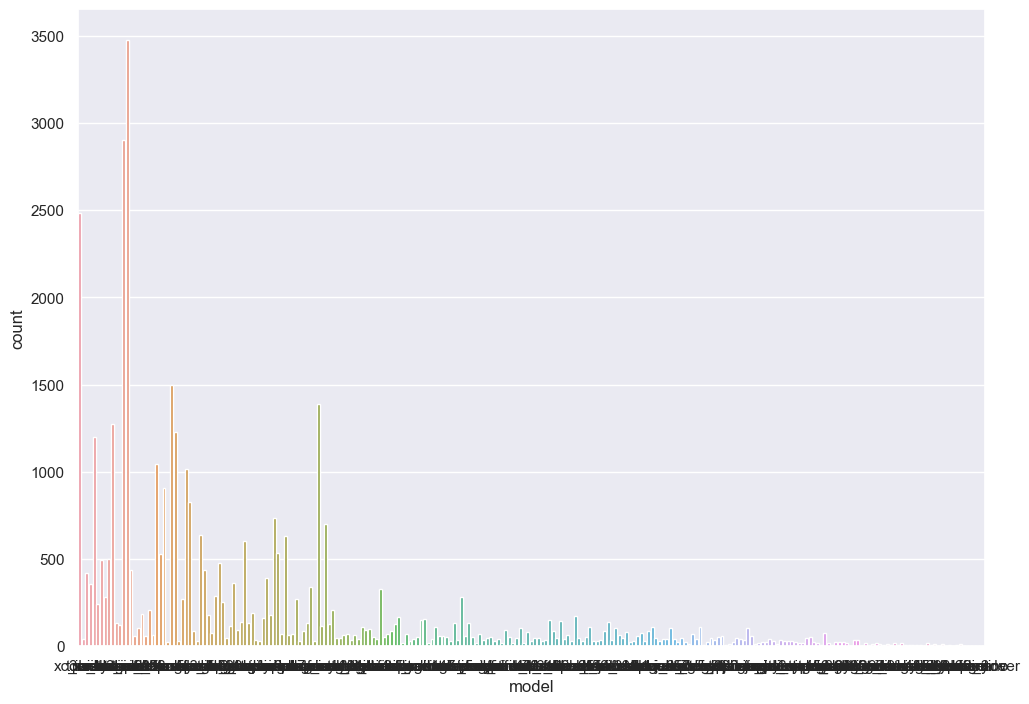

In [77]:
sns.countplot(x=df.model)

<AxesSubplot: xlabel='model', ylabel='price'>

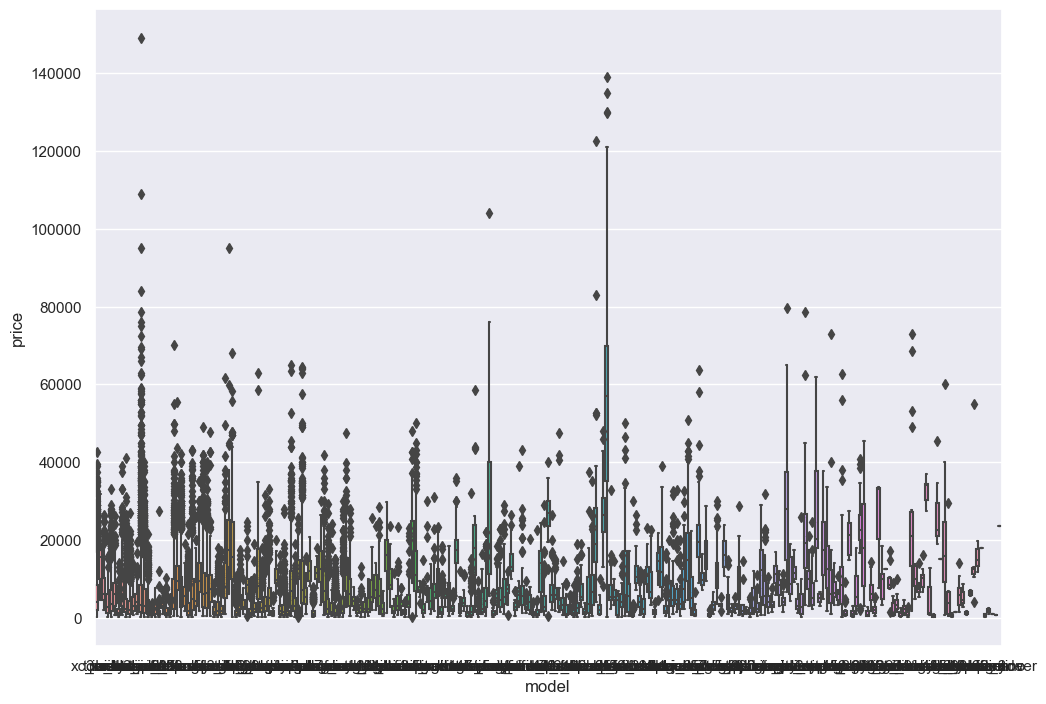

In [78]:
sns.boxplot(data=df,x='model',y='price')

In [79]:
df['kilometer'].value_counts().sort_index()

5000        479
10000       207
20000       651
30000       712
40000       795
50000       932
60000      1101
70000      1182
80000      1378
90000      1484
100000     1824
125000     4597
150000    27430
Name: kilometer, dtype: int64

In [80]:
pd.crosstab(index=df.kilometer,columns='Percent',normalize=True)

col_0,Percent
kilometer,
5000,0.011
10000,0.005
20000,0.015
30000,0.017
40000,0.019
50000,0.022
60000,0.026
70000,0.028
80000,0.032


<AxesSubplot: xlabel='kilometer', ylabel='price'>

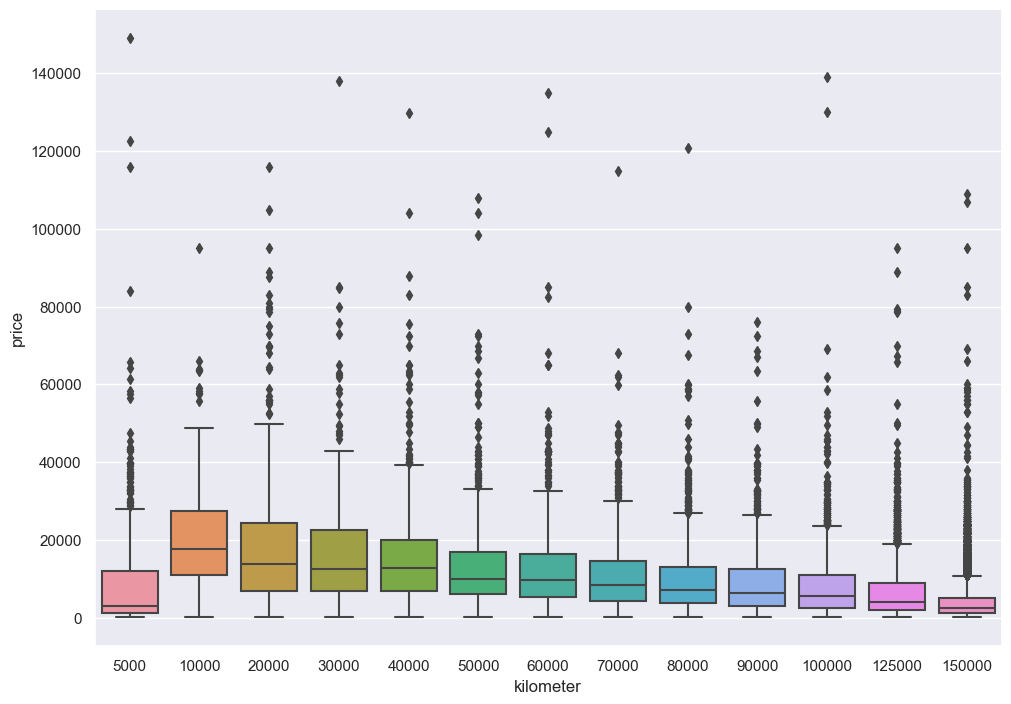

In [81]:
sns.boxplot(data=df,x='kilometer',y='price')

In [82]:
df['fuelType'].value_counts()

petrol     26509
diesel     12854
lpg          690
cng           70
hybrid        36
electro       10
other          6
Name: fuelType, dtype: int64

In [83]:
pd.crosstab(df.fuelType,columns='Percent',normalize=True)

col_0,Percent
fuelType,
cng,0.002
diesel,0.320
electro,0.000
hybrid,0.001
lpg,0.017
other,0.000
petrol,0.660


In [84]:
(pd.crosstab(df.fuelType,columns='Percent',normalize=True)*100).round(2)

col_0,Percent
fuelType,
cng,0.170
diesel,32.000
electro,0.020
hybrid,0.090
lpg,1.720
other,0.010
petrol,65.980


<AxesSubplot: xlabel='fuelType', ylabel='count'>

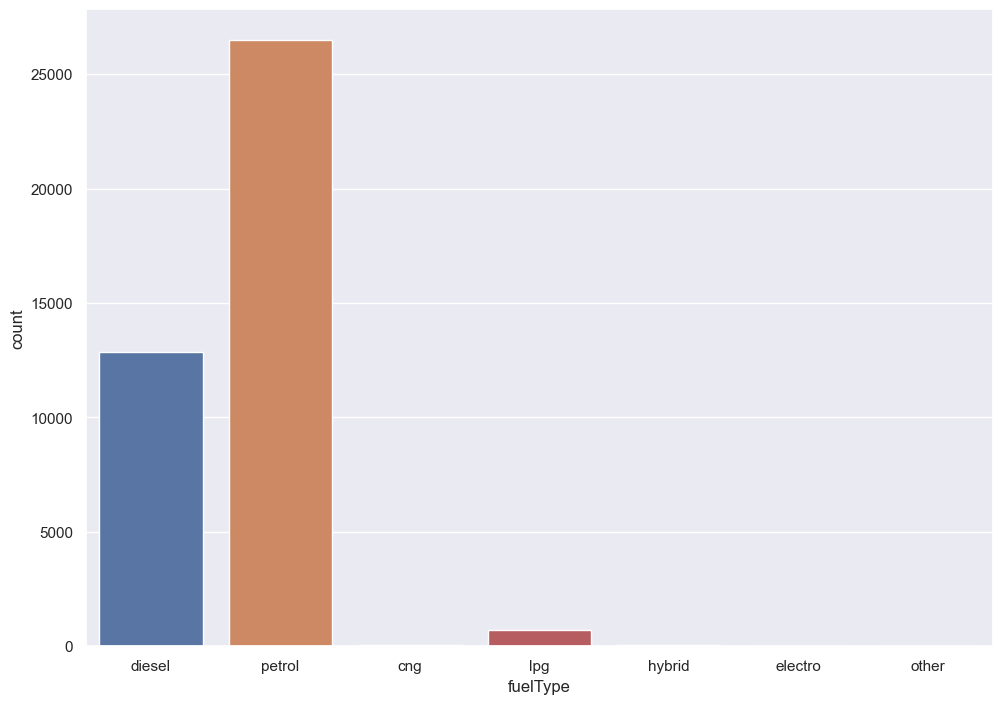

In [85]:
sns.countplot(x=df.fuelType)

<AxesSubplot: xlabel='fuelType', ylabel='price'>

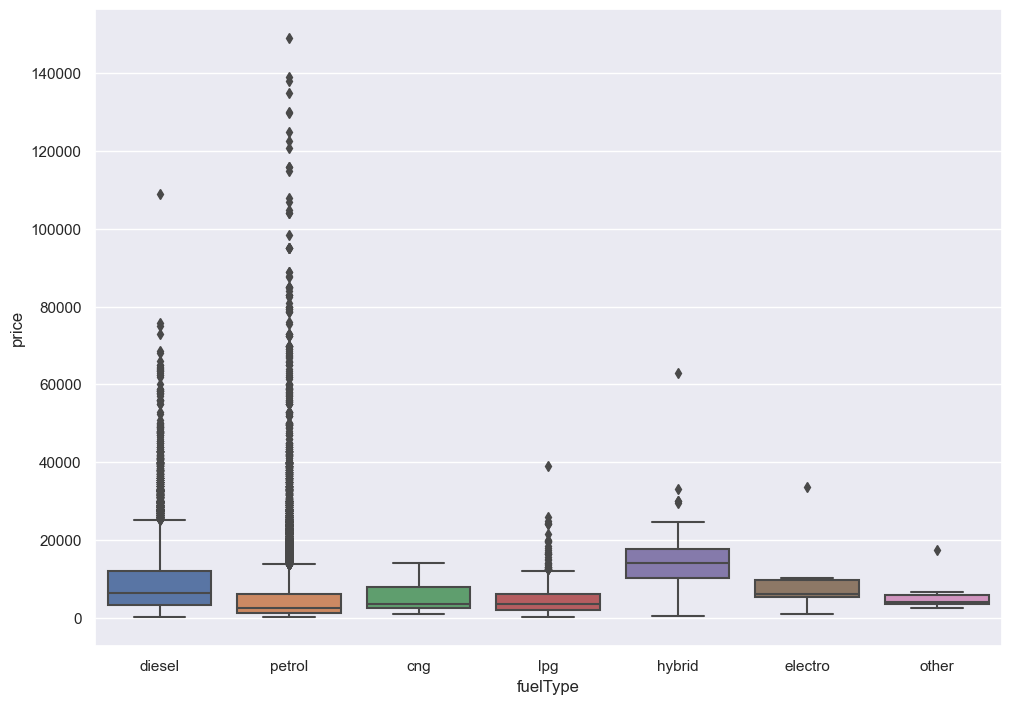

In [86]:
sns.boxplot(data=df,x='fuelType',y='price')

In [87]:
df.brand.value_counts()

volkswagen        9134
bmw               4868
opel              4487
mercedes_benz     4134
audi              3984
ford              2815
renault           1941
peugeot           1323
fiat               996
seat               886
skoda              698
mazda              663
smart              623
nissan             601
citroen            598
toyota             547
volvo              429
mini               428
hyundai            406
mitsubishi         359
honda              300
sonstige_autos     299
kia                276
suzuki             264
porsche            260
alfa_romeo         245
chevrolet          213
chrysler           151
dacia              123
subaru             112
jeep                91
land_rover          81
jaguar              78
daihatsu            67
saab                65
lancia              56
rover               53
daewoo              53
trabant             43
lada                22
Name: brand, dtype: int64

In [88]:
pd.crosstab(df.brand,columns='Percent',normalize=True)

col_0,Percent
brand,
alfa_romeo,0.006
audi,0.093
bmw,0.114
chevrolet,0.005
chrysler,0.004
citroen,0.014
dacia,0.003
daewoo,0.001
daihatsu,0.002


<AxesSubplot: xlabel='brand', ylabel='count'>

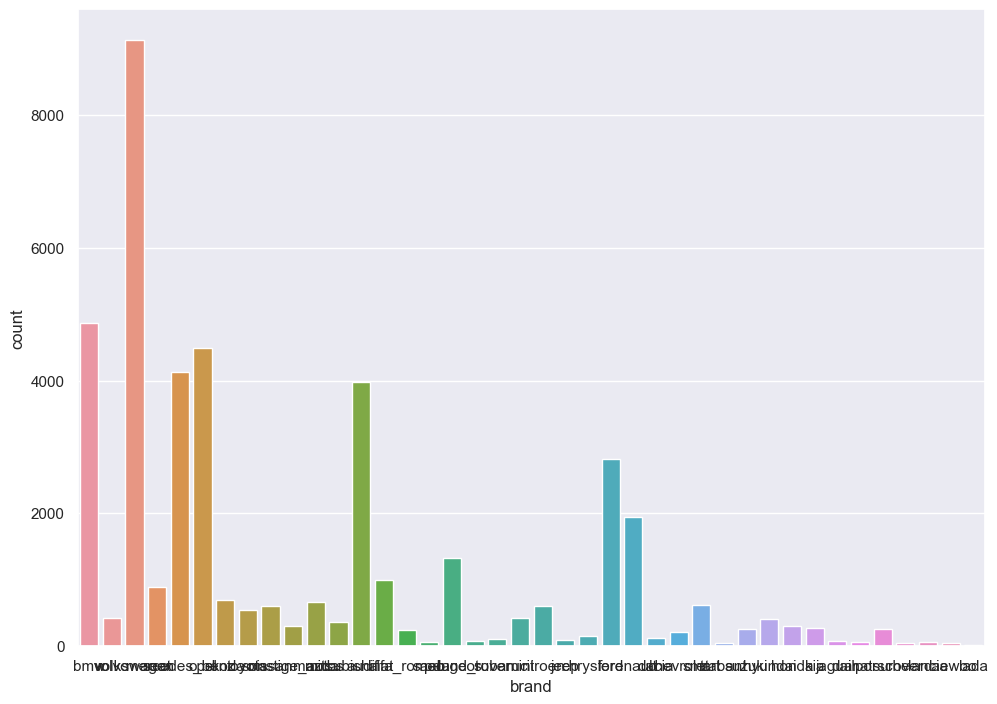

In [89]:
sns.countplot(x=df.brand)

<AxesSubplot: xlabel='brand', ylabel='price'>

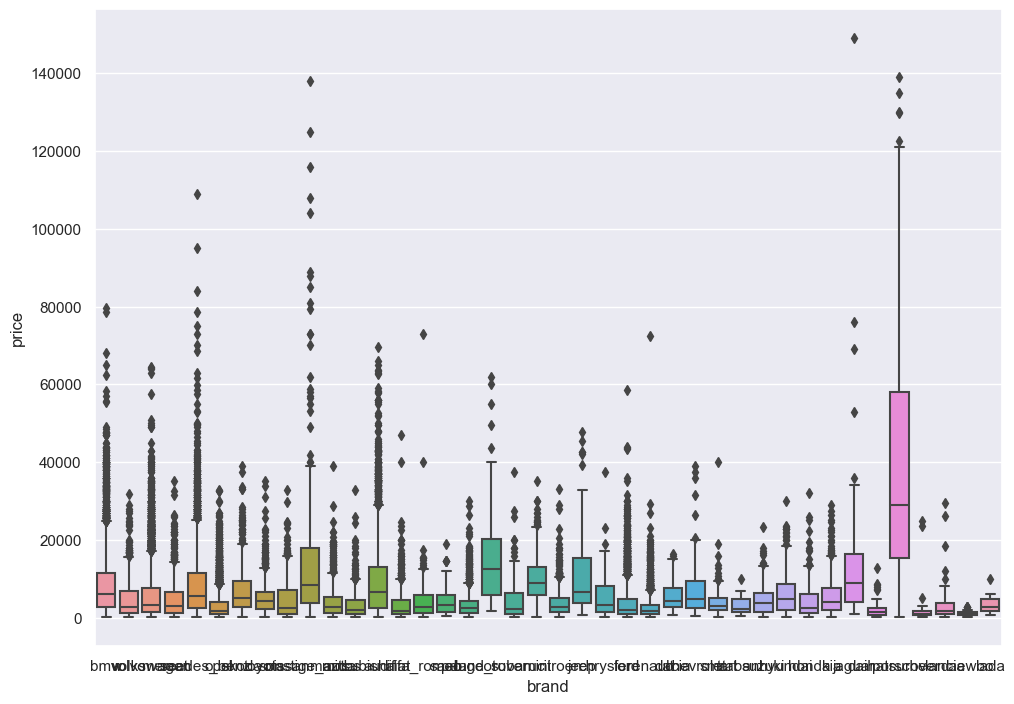

In [90]:
sns.boxplot(x=df['brand'],y=df.price)

In [91]:
df.notRepairedDamage.value_counts()

no     32507
yes     3988
Name: notRepairedDamage, dtype: int64

In [92]:
pd.crosstab(df.notRepairedDamage,columns='Percent',normalize=True)

col_0,Percent
notRepairedDamage,
no,0.891
yes,0.109


In [93]:
pd.crosstab(df.notRepairedDamage,columns='Percent',normalize=True).round(2)*100

col_0,Percent
notRepairedDamage,
no,89.000
yes,11.000


<AxesSubplot: xlabel='notRepairedDamage', ylabel='count'>

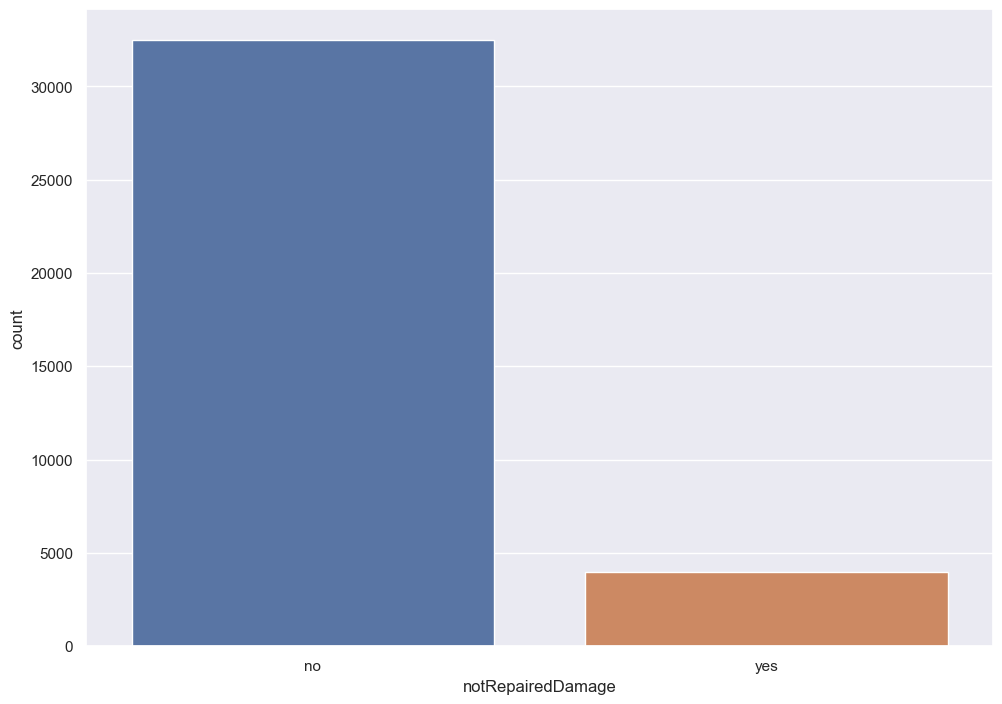

In [94]:
sns.countplot(x=df['notRepairedDamage'])

<AxesSubplot: xlabel='notRepairedDamage', ylabel='price'>

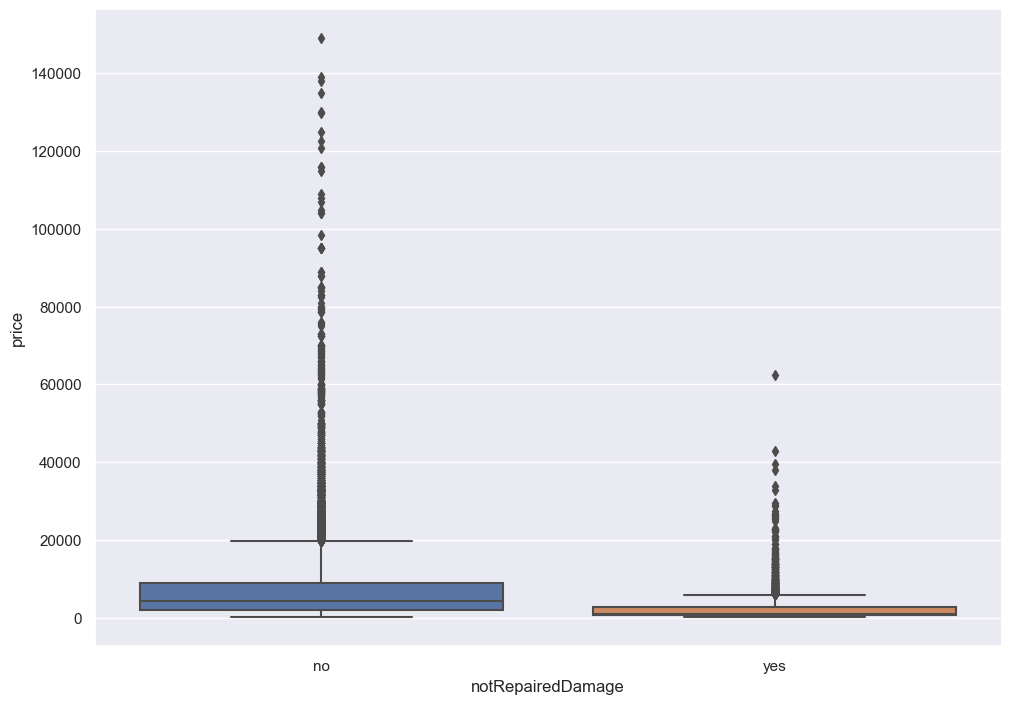

In [95]:
sns.boxplot(data=df,x='notRepairedDamage',y='price')

In [96]:
df=df.drop(['seller','offerType','abtest'],axis=1)

### Removing columns that is not impacting more on the target variable 

In [97]:
df1=df.copy()

In [98]:
df_select = df.select_dtypes(exclude='object')

### Checking the correlation

In [99]:
correlation = df_select.corr().round(3)

In [100]:
correlation

,price,powerPS,kilometer,age
price,1.000,0.575,-0.440,-0.336
powerPS,0.575,1.000,-0.016,-0.151
kilometer,-0.440,-0.016,1.000,0.292
age,-0.336,-0.151,0.292,1.000


### Checking the correlation of features against target variable 'price'

In [101]:
df_select.corr().loc[:,'price']

price        1.000
powerPS      0.575
kilometer   -0.440
age         -0.336
Name: price, dtype: float64

In [102]:
df_select.corr()['price']

price        1.000
powerPS      0.575
kilometer   -0.440
age         -0.336
Name: price, dtype: float64

In [103]:
df_select.corr().loc[:,'price'].abs()

price       1.000
powerPS     0.575
kilometer   0.440
age         0.336
Name: price, dtype: float64

In [104]:
df_select.corr().loc[:,'price'].abs()[1:]

powerPS     0.575
kilometer   0.440
age         0.336
Name: price, dtype: float64

In [105]:
df_select.corr().loc[:,'price'].abs().sort_values(ascending=True)[1:]

kilometer   0.440
powerPS     0.575
price       1.000
Name: price, dtype: float64

In [106]:
df

,price,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,age
0,4450,limousine,manual,150,3er,150000,diesel,bmw,NaN,15.250
1,13299,suv,manual,163,xc_reihe,150000,diesel,volvo,no,13.500
2,3200,bus,manual,101,touran,150000,diesel,volkswagen,NaN,15.920
3,4500,small car,manual,86,ibiza,60000,petrol,seat,no,13.000
4,18750,suv,automatic,185,xc_reihe,150000,diesel,volvo,no,10.920
...,...,...,...,...,...,...,...,...,...,...
49991,10900,limousine,manual,231,x_reihe,150000,petrol,bmw,no,14.670
49992,790,limousine,manual,82,astra,150000,diesel,opel,no,20.750
49993,830,small car,manual,60,clio,125000,petrol,renault,no,19.670
49995,2290,station wagon,manual,101,astra,150000,petrol,opel,no,17.250


### Dropping the rows which is having null values for building model

In [107]:
df_omit=df.dropna(axis=0)

In [108]:
df_omit

,price,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,age
1,13299,suv,manual,163,xc_reihe,150000,diesel,volvo,no,13.500
3,4500,small car,manual,86,ibiza,60000,petrol,seat,no,13.000
4,18750,suv,automatic,185,xc_reihe,150000,diesel,volvo,no,10.920
5,988,limousine,manual,90,passat,150000,petrol,volkswagen,no,23.170
7,1399,coupe,manual,136,clk,150000,petrol,mercedes_benz,no,21.920
...,...,...,...,...,...,...,...,...,...,...
49991,10900,limousine,manual,231,x_reihe,150000,petrol,bmw,no,14.670
49992,790,limousine,manual,82,astra,150000,diesel,opel,no,20.750
49993,830,small car,manual,60,clio,125000,petrol,renault,no,19.670
49995,2290,station wagon,manual,101,astra,150000,petrol,opel,no,17.250


In [109]:
df.shape

(42772, 10)

In [110]:
df_omit.isnull().sum()

price                0
vehicleType          0
gearbox              0
powerPS              0
model                0
kilometer            0
fuelType             0
brand                0
notRepairedDamage    0
age                  0
dtype: int64

In [111]:
df_omit=pd.get_dummies(df_omit,drop_first=True)

### Importing necessary libraries for building resgression model

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

In [113]:
df_omit.columns

Index(['price', 'powerPS', 'kilometer', 'age', 'vehicleType_cabrio',
       'vehicleType_coupe', 'vehicleType_limousine', 'vehicleType_others',
       'vehicleType_small car', 'vehicleType_station wagon',
       ...
       'brand_seat', 'brand_skoda', 'brand_smart', 'brand_subaru',
       'brand_suzuki', 'brand_toyota', 'brand_trabant', 'brand_volkswagen',
       'brand_volvo', 'notRepairedDamage_yes'],
      dtype='object', length=301)

### Dropping the target variable

In [114]:
x1=df_omit.drop(['price'],inplace=False,axis=1)

In [115]:
y1=df_omit['price']

### Normalizing the skewed target variable

In [116]:
prices = pd.DataFrame({'1.Before':y1,'2.After':np.log(y1)})

In [117]:
prices

,1.Before,2.After
1,13299,9.495
3,4500,8.412
4,18750,9.839
5,988,6.896
7,1399,7.244
...,...,...
49991,10900,9.297
49992,790,6.672
49993,830,6.721
49995,2290,7.736


array([[<AxesSubplot: title={'center': '1.Before'}>,
        <AxesSubplot: title={'center': '2.After'}>]], dtype=object)

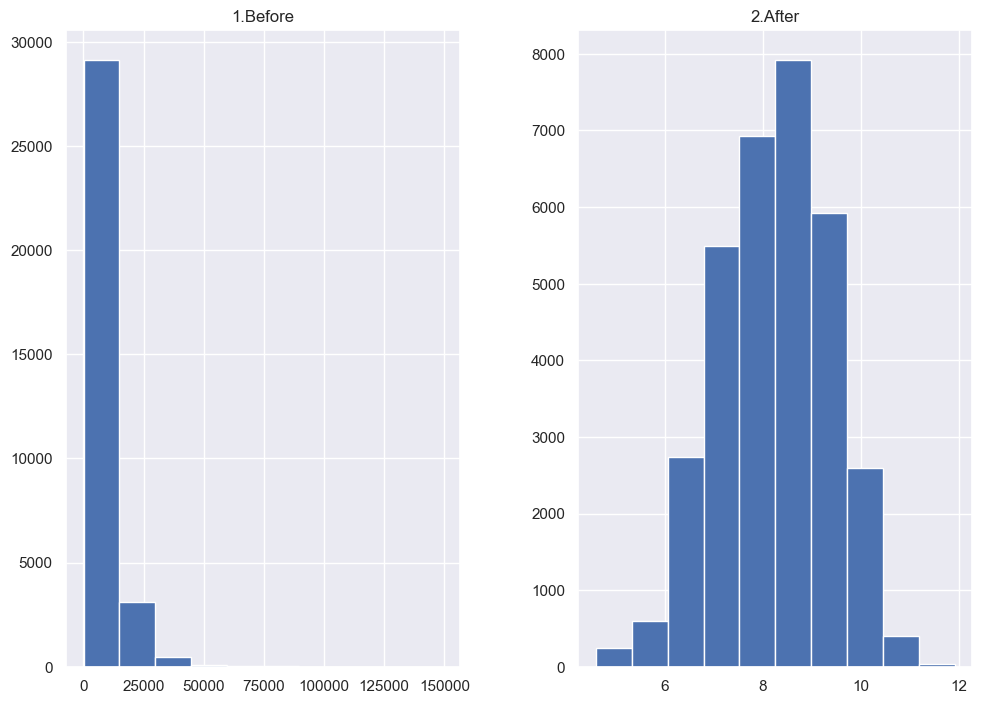

In [118]:
prices.hist()

### Transforming y1 as logarithmic value

In [119]:
y1= np.log(y1)

### Splitting the data into train and test dataset

In [120]:
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state=3)

In [121]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(23018, 300) (9866, 300) (23018,) (9866,)


### Creating variable for baseline prediction

In [122]:
base_pred=np.mean(y_test)
base_pred

8.249615787653267

In [123]:
base_pred=np.repeat(base_pred,len(y_test))
base_pred

array([8.24961579, 8.24961579, 8.24961579, ..., 8.24961579, 8.24961579,
       8.24961579])

### Checking the root mean squared error from the true test values, the model's rmse from predicted values should have the error less than base_rmse

In [124]:
base_rmse_nonull=np.sqrt(mean_squared_error(y_test,base_pred))
base_rmse_nonull

1.1274483657478247

### Linear Regression without null values(Ommited data)

In [125]:
lrg1=LinearRegression(fit_intercept=True)

In [126]:
model_lin1=lrg1.fit(X_train,y_train)

In [127]:
pred_lin1=lrg1.predict(X_test)

In [128]:
pred_lin1

array([8.43257524, 9.78032094, 8.84198777, ..., 8.7016597 , 7.50062221,
       7.90248496])

In [129]:
pred_lin1.shape

(9866,)

In [130]:
lin_rmse1=np.sqrt(mean_squared_error(y_test,pred_lin1))

In [131]:
lin_rmse1

0.5455481266513845

***Observations : The root mean squared value for Linear model is 0.54 which is almost half of the base rmse.***

### Checking the R-Squared values for train and test sets, to measure how well the model fits the train and test data.

In [132]:
r2_lin_test1=model_lin1.score(X_test,y_test)
r2_lin_train1=model_lin1.score(X_train,y_train)

In [133]:
print(r2_lin_train1,r2_lin_test1)

0.7800936978183916 0.7658615091649239


### Checking the residuals

In [134]:
residuals1=y_test-pred_lin1

<AxesSubplot: ylabel='price'>

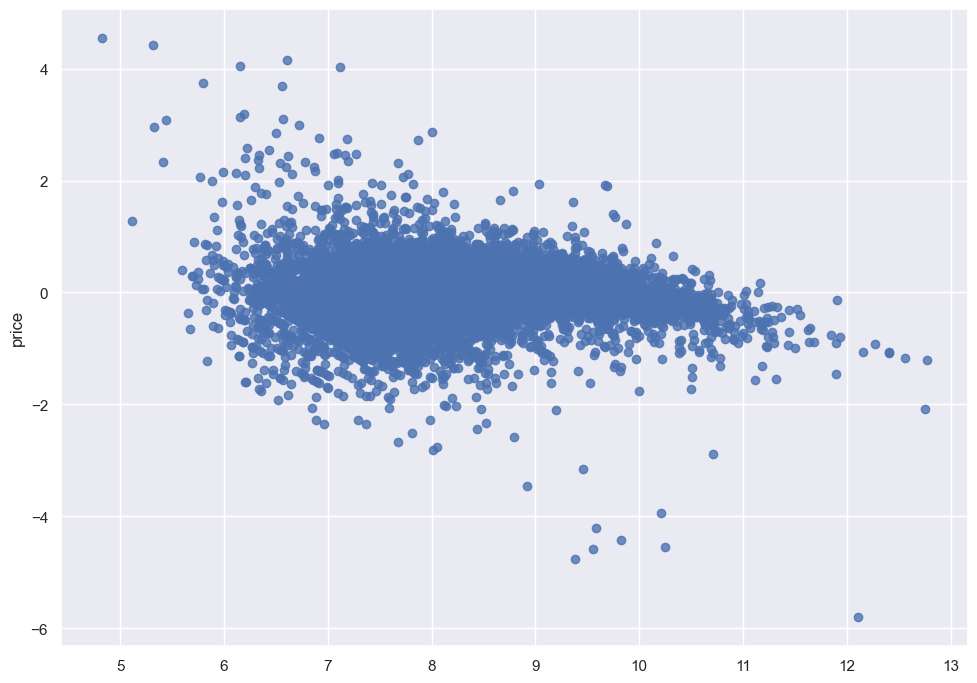

In [135]:
sns.regplot(x=pred_lin1,y=residuals1,scatter=True,fit_reg=False)

In [136]:
residuals1.describe()

count   9866.000
mean       0.003
std        0.546
min       -5.796
25%       -0.261
50%        0.041
75%        0.302
max        4.547
Name: price, dtype: float64

### Random forest Regressor without null values(Ommited data)

In [137]:
rf1=RandomForestRegressor(n_estimators=100,max_depth=100,min_samples_split=10,\
                        min_samples_leaf=4,random_state=1)

In [138]:
model_rf1 = rf1.fit(X_train,y_train)

In [139]:
pred_rf1=model_rf1.predict(X_test)

In [140]:
pred_rf1.shape

(9866,)

In [141]:
rf1_rmse=np.sqrt(mean_squared_error(y_test,pred_rf1))

In [142]:
rf1_rmse

0.4360736289370223

***Observations : The root mean squared value of random forest regressor is 0.43 which is less than rmse of Linear model.***

In [143]:
r2_rf_test1=model_rf1.score(X_test,y_test)
r2_rf_train1=model_rf1.score(X_train,y_train)

In [144]:
print(r2_rf_train1,r2_rf_test1)

0.9202494705146291 0.8504018147750623


***Observations : By Comparing the R-Squared values of Linear regression and Random forest regression, we can find that the Random forest regression model performs better than Linear Regression model.***

### As in the above models, the null values are removed, now creating new dataframe where null values filled based on 2 conditions
### If datatype is float -> fill null values with median
### If datatype is not float(object) -> fill null values with value which is having highest number of count.

In [145]:
df_imp=df.apply(lambda x : x.fillna(x.median()) if x.dtype=='float' else x.fillna(x.value_counts().index[0]))

In [146]:
df_imp

,price,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,age
0,4450,limousine,manual,150,3er,150000,diesel,bmw,no,15.250
1,13299,suv,manual,163,xc_reihe,150000,diesel,volvo,no,13.500
2,3200,bus,manual,101,touran,150000,diesel,volkswagen,no,15.920
3,4500,small car,manual,86,ibiza,60000,petrol,seat,no,13.000
4,18750,suv,automatic,185,xc_reihe,150000,diesel,volvo,no,10.920
...,...,...,...,...,...,...,...,...,...,...
49991,10900,limousine,manual,231,x_reihe,150000,petrol,bmw,no,14.670
49992,790,limousine,manual,82,astra,150000,diesel,opel,no,20.750
49993,830,small car,manual,60,clio,125000,petrol,renault,no,19.670
49995,2290,station wagon,manual,101,astra,150000,petrol,opel,no,17.250


In [147]:
df_imp.isna().sum()

price                0
vehicleType          0
gearbox              0
powerPS              0
model                0
kilometer            0
fuelType             0
brand                0
notRepairedDamage    0
age                  0
dtype: int64

### Creating dummy numeric values for categorical variables

In [148]:
df_imp = pd.get_dummies(df_imp,drop_first=True)

In [149]:
df_imp

,price,powerPS,kilometer,age,vehicleType_cabrio,vehicleType_coupe,vehicleType_limousine,vehicleType_others,vehicleType_small car,vehicleType_station wagon,vehicleType_suv,gearbox_manual,model_145,model_147,model_156,model_159,model_1_reihe,model_1er,model_200,model_2_reihe,model_300c,model_3_reihe,model_3er,model_4_reihe,model_500,model_5_reihe,model_5er,model_601,model_6_reihe,model_6er,model_7er,model_80,model_850,model_90,model_900,model_9000,model_911,model_a1,model_a2,model_a3,model_a4,model_a5,model_a6,model_a8,model_a_klasse,model_accord,model_agila,model_alhambra,model_almera,model_altea,model_amarok,model_antara,model_arosa,model_astra,model_auris,model_avensis,model_aveo,model_aygo,model_b_klasse,model_b_max,model_beetle,model_berlingo,model_bora,model_boxster,model_bravo,model_c1,model_c2,model_c3,model_c4,model_c5,model_c_klasse,model_c_max,model_c_reihe,model_caddy,model_calibra,model_captiva,model_carisma,model_carnival,model_cayenne,model_cc,model_ceed,model_charade,model_cherokee,model_citigo,model_civic,model_cl,model_clio,model_clk,model_clubman,model_colt,model_combo,model_cooper,model_cordoba,model_corolla,model_corsa,model_cr_reihe,model_croma,model_crossfire,model_cuore,model_cx_reihe,model_defender,model_delta,model_discovery,model_doblo,model_ducato,model_duster,model_e_klasse,model_elefantino,model_eos,model_escort,model_espace,model_exeo,model_fabia,model_fiesta,model_focus,model_forester,model_forfour,model_fortwo,model_fox,model_freelander,model_fusion,model_g_klasse,model_galant,model_galaxy,model_getz,model_gl,model_glk,model_golf,model_grand,model_i3,model_i_reihe,model_ibiza,model_impreza,model_insignia,model_jazz,model_jetta,model_jimny,model_juke,model_justy,model_ka,model_kadett,model_kaefer,model_kalina,model_kalos,model_kangoo,model_kuga,model_laguna,model_lancer,model_lanos,model_legacy,model_leon,model_lodgy,model_logan,model_lupo,model_lybra,model_m_klasse,model_m_reihe,model_materia,model_matiz,model_megane,model_meriva,model_micra,model_mii,model_modus,model_mondeo,model_move,model_musa,model_mustang,model_mx_reihe,model_navara,model_niva,model_note,model_nubira,model_octavia,model_omega,model_one,model_others,model_outlander,model_pajero,model_panda,model_passat,model_phaeton,model_picanto,model_polo,model_primera,model_ptcruiser,model_punto,model_q3,model_q5,model_q7,model_qashqai,model_r19,model_range_rover,model_range_rover_evoque,model_range_rover_sport,model_rangerover,model_rav,model_rio,model_roadster,model_roomster,model_rx_reihe,model_s60,model_s_klasse,model_s_max,model_s_type,model_sandero,model_santa,model_scenic,model_scirocco,model_seicento,model_serie_2,model_serie_3,model_sharan,model_signum,model_sirion,model_sl,model_slk,model_sorento,model_spark,model_spider,model_sportage,model_sprinter,model_stilo,model_superb,model_swift,model_terios,model_tigra,model_tiguan,model_toledo,model_touareg,model_touran,model_transit,model_transporter,model_tt,model_tucson,model_twingo,model_up,model_v40,model_v50,model_v60,model_v70,model_v_klasse,model_vectra,model_verso,model_viano,model_vito,model_vivaro,model_voyager,model_wrangler,model_x_reihe,model_x_trail,model_x_type,model_xc_reihe,model_yaris,model_yeti,model_ypsilon,model_z_reihe,model_zafira,fuelType_diesel,fuelType_electro,fuelType_hybrid,fuelType_lpg,fuelType_other,fuelType_petrol,brand_audi,brand_bmw,brand_chevrolet,brand_chrysler,brand_citroen,brand_dacia,brand_daewoo,brand_daihatsu,brand_fiat,brand_ford,brand_honda,brand_hyundai,brand_jaguar,brand_jeep,brand_kia,brand_lada,brand_lancia,brand_land_rover,brand_mazda,brand_mercedes_benz,brand_mini,brand_mitsubishi,brand_nissan,brand_opel,brand_peugeot,brand_porsche,brand_renault,brand_rover,brand_saab,brand_seat,brand_skoda,brand_smart,brand_sonstige_autos,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo,notRepairedDamage_yes
0,4450,150,150000,15.250,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [150]:
x2=df_imp.drop(['price'],inplace=False,axis=1)

In [151]:
y2=df_imp['price']

In [152]:
prices = pd.DataFrame({'1.Before':y1,'2.After':np.log(y1)})

In [153]:
prices

,1.Before,2.After
1,9.495,2.251
3,8.412,2.130
4,9.839,2.286
5,6.896,1.931
7,7.244,1.980
...,...,...
49991,9.297,2.230
49992,6.672,1.898
49993,6.721,1.905
49995,7.736,2.046


array([[<AxesSubplot: title={'center': '1.Before'}>,
        <AxesSubplot: title={'center': '2.After'}>]], dtype=object)

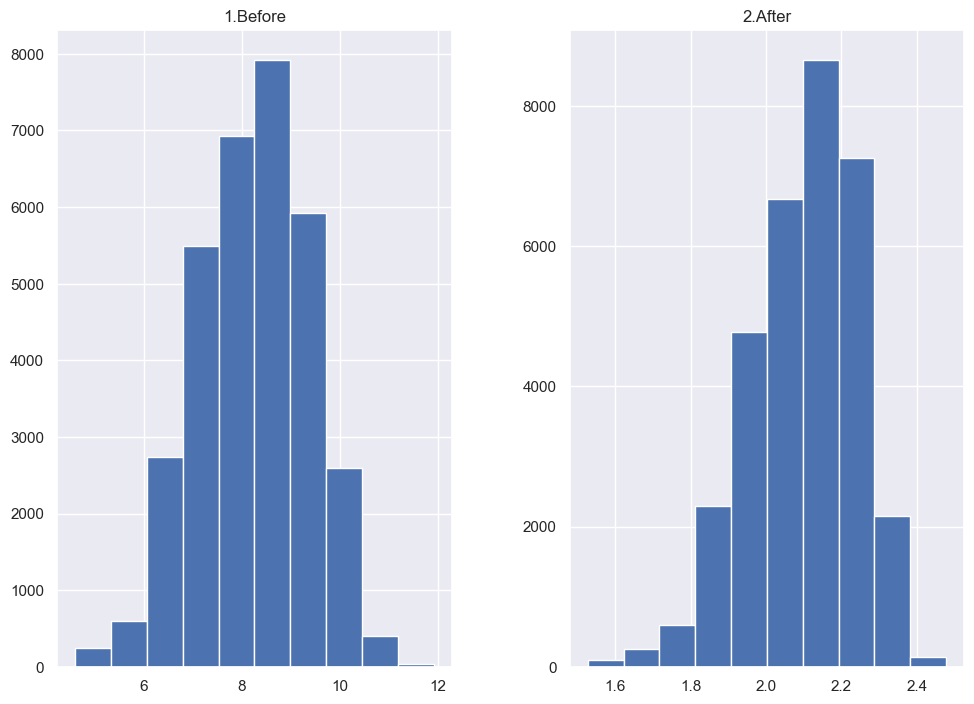

In [154]:
prices.hist()

In [155]:
y2=np.log(y2)

In [156]:
X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size=0.3, random_state=3)

In [157]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(29940, 303) (12832, 303) (29940,) (12832,)


In [158]:
base_pred=np.mean(y_test)

In [159]:
base_pred=np.repeat(base_pred,len(y_test))

In [160]:
base_rmse_replaced=np.sqrt(mean_squared_error(y_test,base_pred))

In [161]:
base_rmse_replaced

1.1884349112889792

### Building both Linear Regression and Random forest Regressor model on newly formed data

### Linear regression replacing null values and categorical variable(Imputed data)

In [162]:
lrg2=LinearRegression(fit_intercept=True)

In [163]:
model_lin2=lrg2.fit(X_train,y_train)

In [164]:
pred_lin2=lrg2.predict(X_test)

In [165]:
pred_lin2

array([8.94230591, 8.37209977, 9.51036542, ..., 8.2115615 , 7.76484305,
       8.6818465 ])

In [166]:
pred_lin2.shape

(12832,)

In [167]:
lin_rmse2=np.sqrt(mean_squared_error(y_test,pred_lin2))

In [168]:
lin_rmse2

0.6483956449231307

***Observations : The root mean squared value of Linear model is 0.64 which is less than the base rmse calculated by the mean of y_test***

In [169]:
r2_lin_test2=model_lin2.score(X_test,y_test)
r2_lin_train2=model_lin2.score(X_train,y_train)

In [170]:
print(r2_lin_train2,r2_lin_test2)

0.7071658736894363 0.7023339008631175


In [171]:
residuals2=y_test-pred_lin2

<AxesSubplot: ylabel='price'>

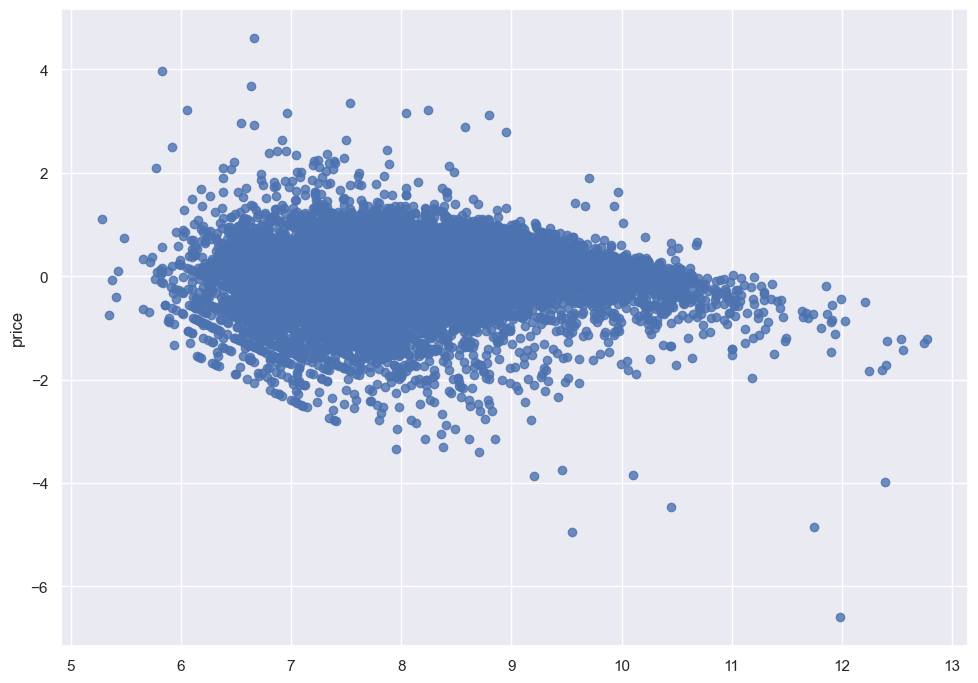

In [172]:
sns.regplot(x=pred_lin2,y=residuals2,scatter=True,fit_reg=False)

In [173]:
residuals2.describe()

count   12832.000
mean       -0.024
std         0.648
min        -6.591
25%        -0.348
50%         0.043
75%         0.374
max         4.607
Name: price, dtype: float64

### Random forest regression - replacing null values and categorical variable(Imputed data)

In [174]:
rf2=RandomForestRegressor(n_estimators=100,max_depth=100,min_samples_split=10,\
                        min_samples_leaf=4,random_state=1)

In [175]:
model_rf2 = rf2.fit(X_train,y_train)

In [176]:
pred_rf2=model_rf2.predict(X_test)

In [177]:
pred_rf2.shape

(12832,)

In [178]:
rf2_rmse=np.sqrt(mean_squared_error(y_test,pred_rf2))

In [179]:
rf2_rmse

0.494313994408829

***Observations : The root mean squared error is 0.49, which is less compared to linear modmel and baseline model***

In [180]:
r2_rf_test2=model_rf2.score(X_test,y_test)
r2_rf_train2=model_rf2.score(X_train,y_train)

In [181]:
print(r2_rf_train2,r2_rf_test2)

0.9024289431669166 0.8269964521311131


***Observations : After replacing the null values with appropriate data and converting the categorical variable to numerical variable in dataset, R-Squared values of Linear regression and Random forest regression, we can find that the Random forest regression model performs better than Linear Regression model.***

In [182]:
print('Linear regression - without null values(Train, Test): ',r2_lin_train1,r2_lin_test1)
print('Random forest regression - without null values(Train, Test): ',r2_rf_train1,r2_rf_test1)
print('Base rmse - without null values): ',base_rmse_nonull)
print('Linear model - rmse - without null values): ',lin_rmse1)
print('Random forest model - rmse - without null values): ',rf1_rmse)
print('Linear regression - replacing null values and categorical variable(Train, Test): ',r2_lin_train2,r2_lin_test2)
print('Random forest regression - replacing null values and categorical variable(Train, Test): ',r2_rf_train2,r2_rf_test2)
print('Base rmse - replacing null values and categorical variable): ',base_rmse_replaced)
print('Linear model - rmse - replacing null values and categorical variable): ',lin_rmse2)
print('Random forest model - rmse - replacing null values and categorical variable): ',rf2_rmse)

Linear regression - without null values(Train, Test):  0.7800936978183916 0.7658615091649239
Random forest regression - without null values(Train, Test):  0.9202494705146291 0.8504018147750623
Base rmse - without null values):  1.1274483657478247
Linear model - rmse - without null values):  0.5455481266513845
Random forest model - rmse - without null values):  0.4360736289370223
Linear regression - replacing null values and categorical variable(Train, Test):  0.7071658736894363 0.7023339008631175
Random forest regression - replacing null values and categorical variable(Train, Test):  0.9024289431669166 0.8269964521311131
Base rmse - replacing null values and categorical variable):  1.1884349112889792
Linear model - rmse - replacing null values and categorical variable):  0.6483956449231307
Random forest model - rmse - replacing null values and categorical variable):  0.494313994408829


***Overall Observations :***
1. Random forest regression - without null values outperforms the linear model and other model built by replacing null values and categorical variables.
2. Eventhough the data with ommited values performs well, we can't let go of the records with null to clean the data, as it is also crucial for the model to understand.